# STEP 1 : Defining the problem statement

1. **Problem Statement** :The task is to develop a predictive model to estimate car prices using a dataset of independent variables, providing clarity on pricing influences. This involves applying data science techniques to uncover relationships between features and price outcomes. The model will serve as a decision-making tool for management in a new market.
- Utilizes available independent variables to predict car prices accurately.
- Employs data science methods like regression or machine learning for analysis.
- Assumes a dataset with relevant car-related features for modeling purposes.

2. **Business Objective:** The goal is to deliver insights into how independent variables impact car prices, guiding strategic decisions on design and business planning. This will enable the company to target specific price levels and strengthen market positioning. It supports profitability and customer satisfaction through informed adjustments.
- Empowers management to adjust car features based on pricing insights.
- Enhances competitiveness by aligning offerings with market expectations.
- Optimizes resource allocation and marketing strategies for better outcomes.

3. **Problem Description:** The project entails building a model to predict car prices by analyzing independent variables with data science techniques. It will highlight key factors driving price variations, aiding in design and strategy optimization. The solution will help management navigate pricing dynamics effectively in a new market.
- Applies advanced analytics to identify price-influencing variables.
- Supports simulation of pricing scenarios for strategic planning.
- Provides a tool to adapt to market-specific demands and trends.

# Import Libraries

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import joblib

# Model selection & CV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# ANN (Deep Learning)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


# Universal print function
def print_evaluation(model_name, mae, mse, rmse, r2, cv_r2=None, best_params=None):
    print(f"------ {model_name} ------")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")
    if cv_r2 is not None:
        print(f"Cross-Validation R2 Score (mean): {cv_r2:.4f}")
    if best_params is not None:
        print(f"Best Hyperparameters: {best_params}")
    print("--------------------------------\n")


# STEP 2 : Upload Files to Colab

# STEP 3 : Load the Data

In [ ]:
# Load the CSV files
df = pd.read_csv("auto_imports.csv")

In [ ]:
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


# STEP 4 : Basic Checks

In [ ]:
# no of rows and columns
print("Shape:", df.shape)

Shape: (200, 26)


In [ ]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            200 non-null    int64  
 1   ?            200 non-null    object 
 2   alfa-romero  200 non-null    object 
 3   gas          200 non-null    object 
 4   std          200 non-null    object 
 5   two          200 non-null    object 
 6   convertible  200 non-null    object 
 7   rwd          200 non-null    object 
 8   front        200 non-null    object 
 9   88.6         200 non-null    float64
 10  168.8        200 non-null    float64
 11  64.1         200 non-null    float64
 12  48.8         200 non-null    float64
 13  2548         200 non-null    int64  
 14  dohc         200 non-null    object 
 15  four         200 non-null    object 
 16  130          200 non-null    int64  
 17  mpfi         200 non-null    object 
 18  3.47         200 non-null    object 
 19  2.68    

In [ ]:
# print first 5 rows
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [ ]:
#print last 5 rows
df.tail()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
#print all columns
df.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.6', '168.8', '64.1', '48.8', '2548', 'dohc', 'four', '130',
       'mpfi', '3.47', '2.68', '9', '111', '5000', '21', '27', '13495'],
      dtype='object')

 **Rename the columns**

In [ ]:
# Define the list of column names based on the dataset description
column_names = [
    'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
    'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
    'length', 'width', 'height', 'curb-weight', 'engine-type',
    'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
    'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]

# Rename all columns using the list
df.columns = column_names

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [ ]:
#check datatype of each columns
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,200.0,0.8300,1.248557,-2.0,0.000,1.0,2.000,3.0
wheel-base,200.0,98.8480,6.038261,86.6,94.500,97.0,102.400,120.9
length,200.0,174.2280,12.347132,141.1,166.675,173.2,183.500,208.1
width,200.0,65.8980,2.102904,60.3,64.175,65.5,66.675,72.0
height,200.0,53.7915,2.428449,47.8,52.000,54.1,55.525,59.8
curb-weight,200.0,2555.7050,518.594552,1488.0,2163.000,2414.0,2928.250,4066.0
engine-size,200.0,126.8600,41.650501,61.0,97.750,119.5,142.000,326.0
compression-ratio,200.0,10.1701,4.014163,7.0,8.575,9.0,9.400,23.0
city-mpg,200.0,25.2000,6.432487,13.0,19.000,24.0,30.000,49.0
highway-mpg,200.0,30.7050,6.827227,16.0,25.000,30.0,34.000,54.0


In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [ ]:
df.describe(include='O')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
count,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500
freq,36,32,180,164,113,94,118,197,145,156,91,23,19,19,36


In [ ]:
print(df.eq('?').sum())

symboling             0
normalized-losses    36
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


## Handling missing values

In [ ]:
summary = pd.DataFrame({
    'Count_of_?': df.eq('?').sum(),
    'Data_Type': df.dtypes
})

print(summary)

                   Count_of_? Data_Type
symboling                   0     int64
normalized-losses          36    object
make                        0    object
fuel-type                   0    object
aspiration                  0    object
num-of-doors                2    object
body-style                  0    object
drive-wheels                0    object
engine-location             0    object
wheel-base                  0   float64
length                      0   float64
width                       0   float64
height                      0   float64
curb-weight                 0     int64
engine-type                 0    object
num-of-cylinders            0    object
engine-size                 0     int64
fuel-system                 0    object
bore                        4    object
stroke                      4    object
compression-ratio           0   float64
horsepower                  2    object
peak-rpm                    2    object
city-mpg                    0     int64


In [ ]:
# Select only object columns
object_cols = df.select_dtypes(include='object').columns

# Loop through each object column and print its value counts
for col in object_cols:
    print(f"\nValue counts for column: '{col}'")
    print(df[col].value_counts(dropna=False))  # dropna=False includes NaN in the counts


Value counts for column: 'normalized-losses'
normalized-losses
?      36
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

Value counts for column: 'make'
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet   

In [ ]:
# Step 1: Replace '?' with np.nan in the entire dataframe
df.replace('?', np.nan, inplace=True)

# Step 2: Convert the relevant object columns to numeric
numeric_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 3: Fill missing values in numeric columns with the median of each column
for col in numeric_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Step 4: For 'num-of-doors' which is categorical but has missing values, fill with mode (most frequent)
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

# Optional: Verify if there are any missing values left
print(df.isnull().sum())


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


There are no missing values

In [ ]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

### Numeric Encoding of 'num-of-cylinders' Column

In [ ]:
# Create a mapping dictionary for textual numbers to numeric
cylinder_mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

# Apply the mapping to the column
df['num-of-cylinders'] = df['num-of-cylinders'].map(cylinder_mapping)

# Verify the conversion
print(df['num-of-cylinders'].value_counts())

num-of-cylinders
4     156
6      24
5      10
2       4
8       4
3       1
12      1
Name: count, dtype: int64


### Numeric Encoding of 'num-of-doors' Column

In [ ]:
# Mapping 'num-of-doors' from text to numeric
door_mapping = {'two': 2, 'four': 4}
df['num-of-doors'] = df['num-of-doors'].map(door_mapping)

# Confirm changes
df['num-of-doors'].head()

0    2
1    2
2    4
3    4
4    2
Name: num-of-doors, dtype: int64

# STEP 5 : Domain analysis

1. **Symboling**: This shows how risky a car is for insurance, ranging from -3 (very safe) to 3 (very risky). It helps insurance companies decide how much to charge for coverage based on accident chances.

2. **Normalized-losses**: This is a number between 65 and 256 that shows the average insurance payout per car per year. It tells us how much money is typically lost on a car compared to others of the same size.

3. **Make**: This is the brand of the car, like Toyota, BMW, or Honda, with 22 options listed. It shows who made the car, which can affect its price and quality.

4. **Fuel-type**: This tells us if the car runs on diesel or gas. It’s important because it affects fuel costs and how the car performs.

5. **Aspiration**: This is either "std" (standard) or "turbo," showing if the engine has extra power. Turbo cars are faster but might cost more.

6. **Num-of-doors**: This says if the car has two or four doors. It matters for convenience and how many people can ride comfortably.

7. **Body-style**: This describes the car’s shape, like sedan, hatchback, or convertible. It affects how the car looks and what it’s used for, like family trips or sporty driving.

8. **Drive-wheels**: This shows how power goes to the wheels—4wd (all four), fwd (front), or rwd (rear). It changes how the car handles on different roads.

9. **Engine-location**: This tells if the engine is in the front or rear of the car. Most cars have it in front, but rear engines are common in sports cars.

10. **Wheel-base**: This is the distance between the front and back wheels, from 86.6 to 120.9 units. A longer wheel-base usually means a bigger, more stable car.

11. **Length**: This is how long the car is, from 141.1 to 208.1 units. Longer cars might have more space but can be harder to park.

12. **Width**: This is how wide the car is, from 60.3 to 72.3 units. Wider cars can feel roomier inside and more stable on the road.

13. **Height**: This is how tall the car is, from 47.8 to 59.8 units. Taller cars might offer better views but could be less sporty.

14. **Curb-weight**: This is the car’s weight without passengers, from 1488 to 4066 pounds. Heavier cars might be safer but use more fuel.

15. **Engine-type**: This lists engine designs like "ohc" or "rotor," showing how the engine is built. Different types affect power and maintenance costs.

16. **Num-of-cylinders**: This counts the cylinders in the engine, from two to twelve. More cylinders usually mean more power but higher fuel use.

17. **Engine-size**: This measures the engine’s size, from 61 to 326 units. Bigger engines give more power but might cost more and use more gas.

18. **Fuel-system**: This shows how fuel gets to the engine, like "mpfi" or "2bbl." It affects how efficiently the car runs.

19. **Bore**: This is the width of the engine cylinders, from 2.54 to 3.94 units. A bigger bore can mean more power from the engine.

20. **Stroke**: This is the distance the piston moves in the cylinder, from 2.07 to 4.17 units. It helps determine how the engine performs.

21. **Compression-ratio**: This is a number from 7 to 23 showing how much the fuel is squeezed before burning. Higher ratios can mean better efficiency or power.

22. **Horsepower**: This measures engine power, from 48 to 288. More horsepower makes a car faster and often more expensive.

23. **Peak-rpm**: This is the top speed the engine can spin, from 4150 to 6600 revolutions per minute. Higher peak-rpm means the engine can work harder.

24. **City-mpg**: This shows miles per gallon in city driving, from 13 to 49. It tells how fuel-efficient the car is in stop-and-go traffic.

25. **Highway-mpg**: This is miles per gallon on highways, from 16 to 54. It shows fuel efficiency for long, steady drives.

26. **Price**: This is the car’s cost, from 5118 to 45400 dollars. It’s what we want to predict and depends on all the other features.


# STEP 6 : EDA

## Univariate Analysis

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

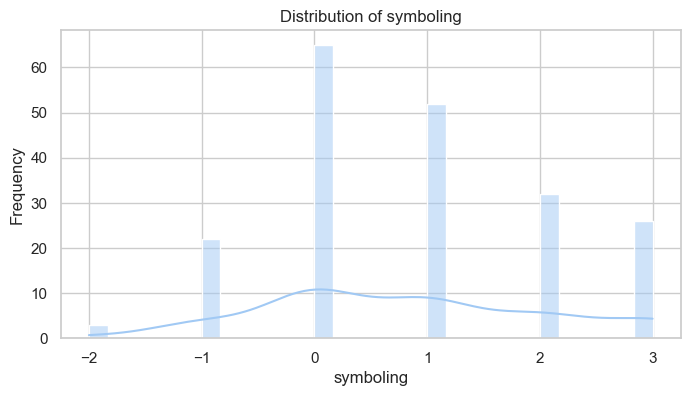

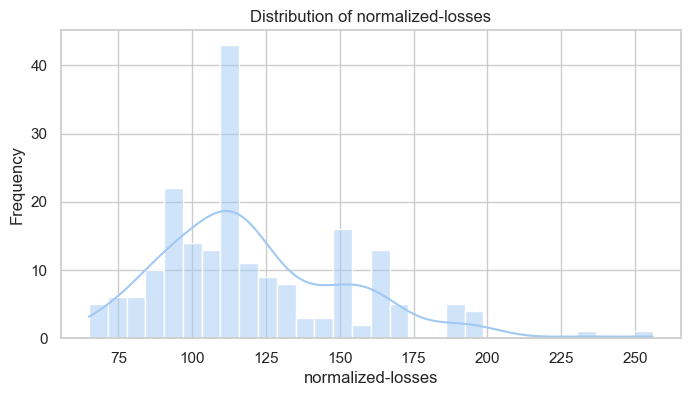

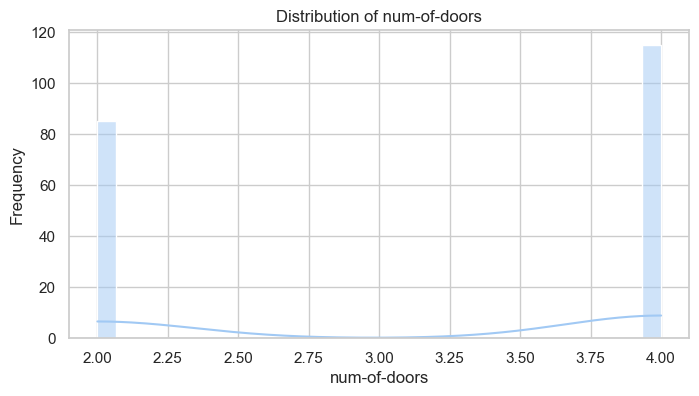

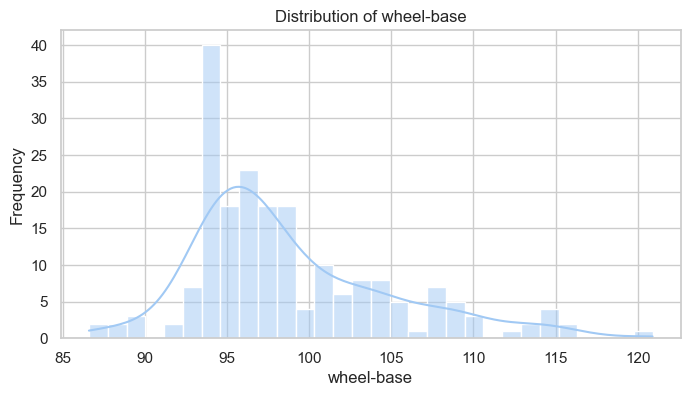

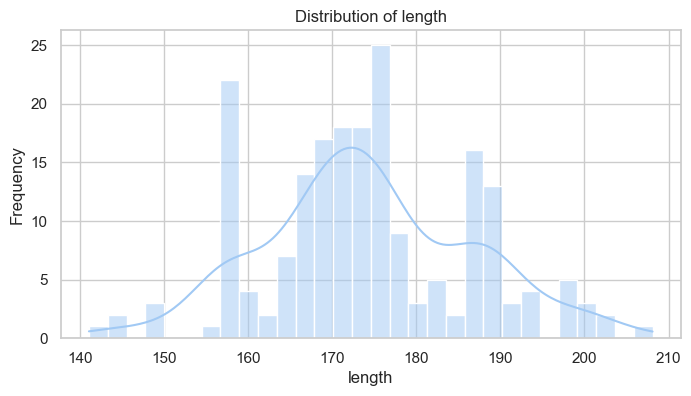

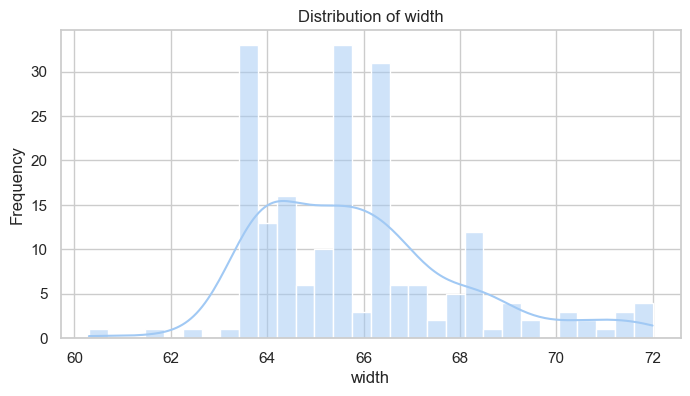

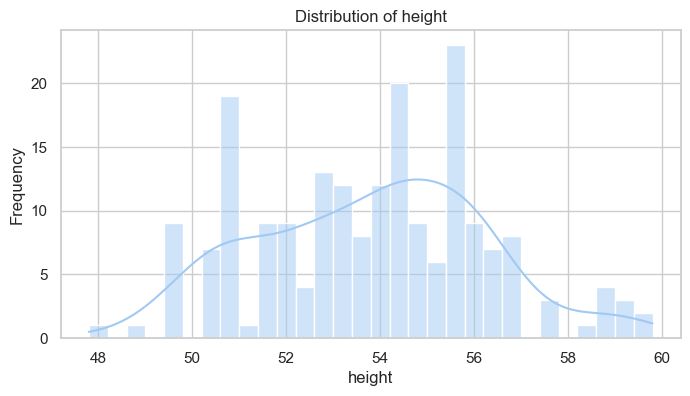

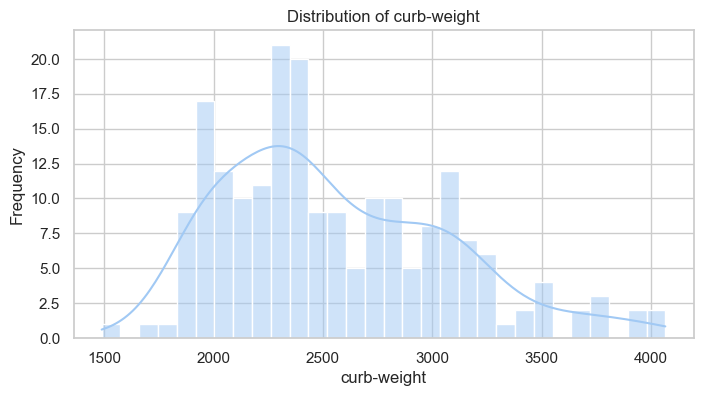

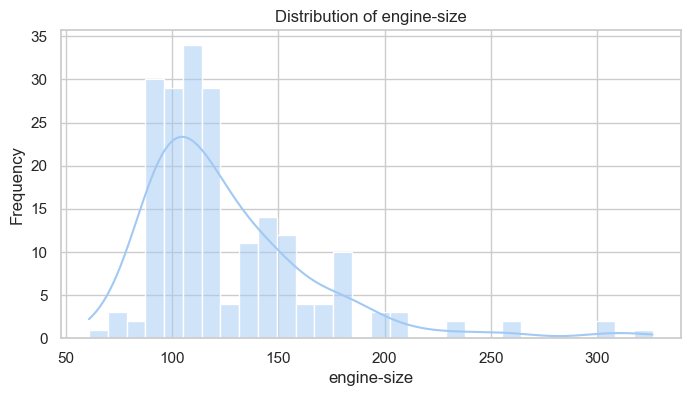

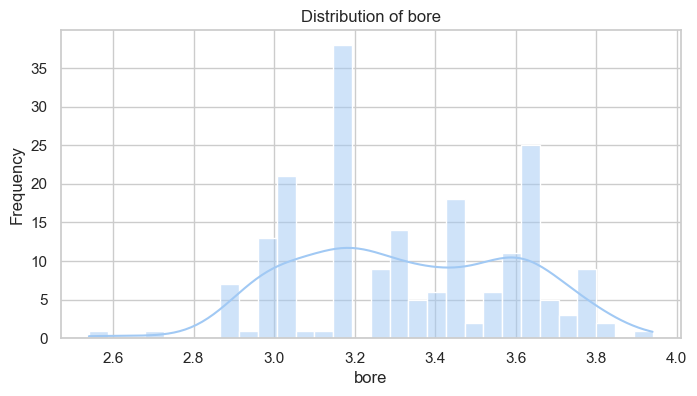

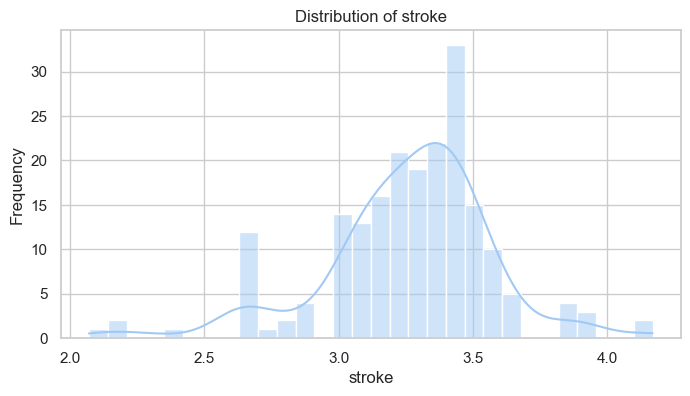

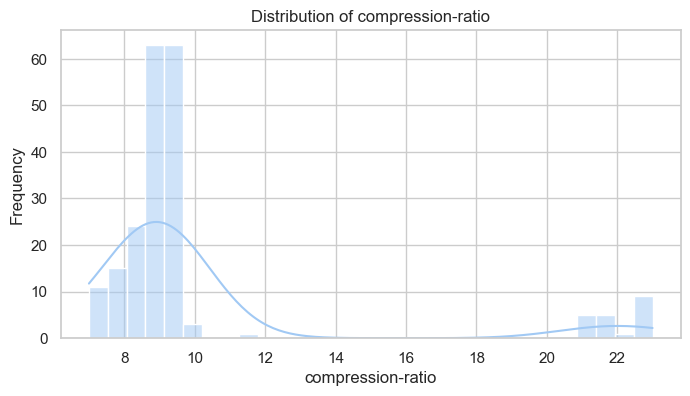

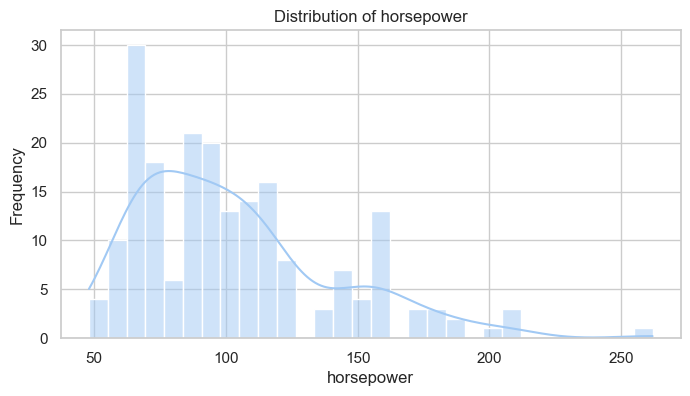

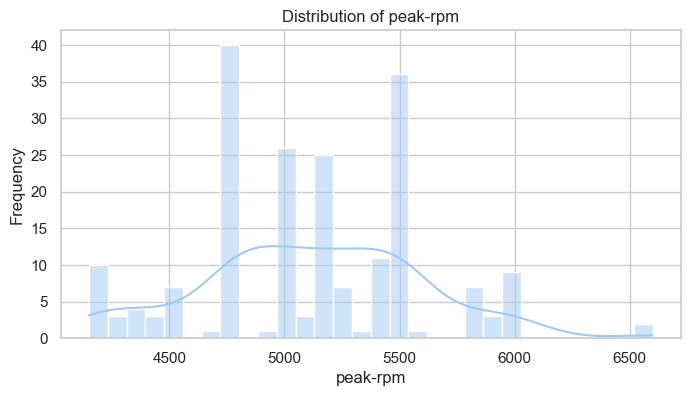

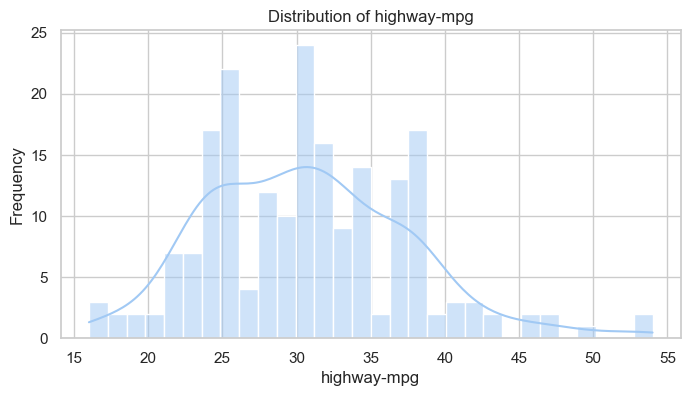

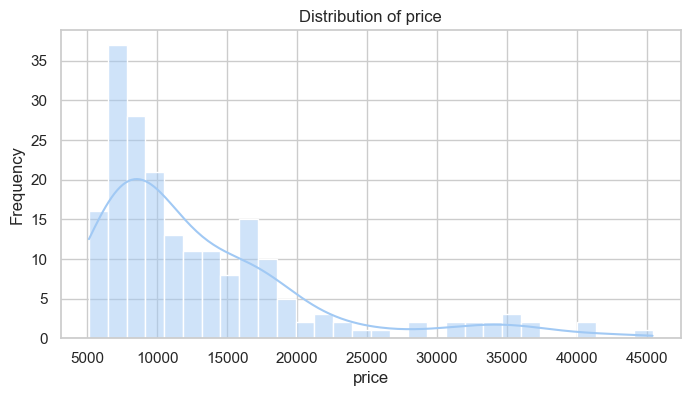

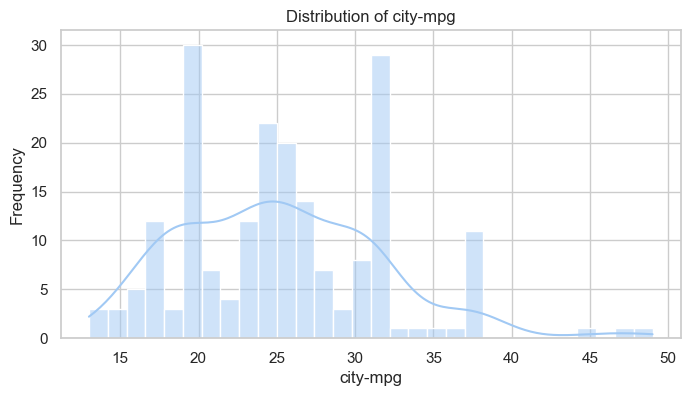

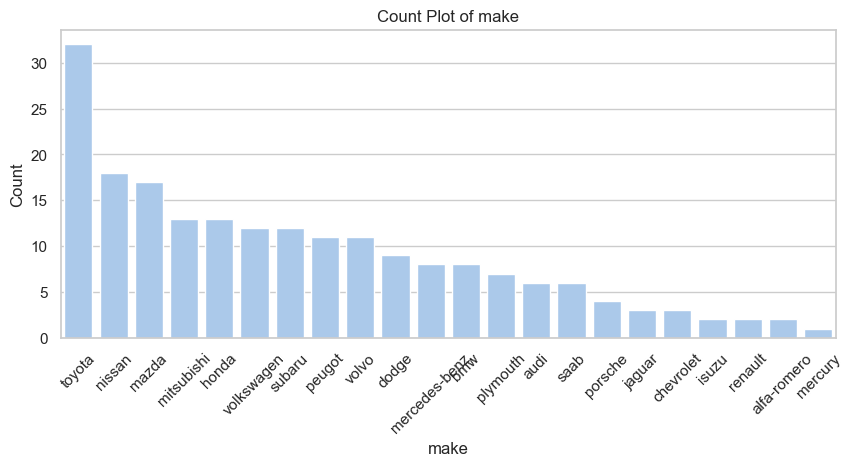

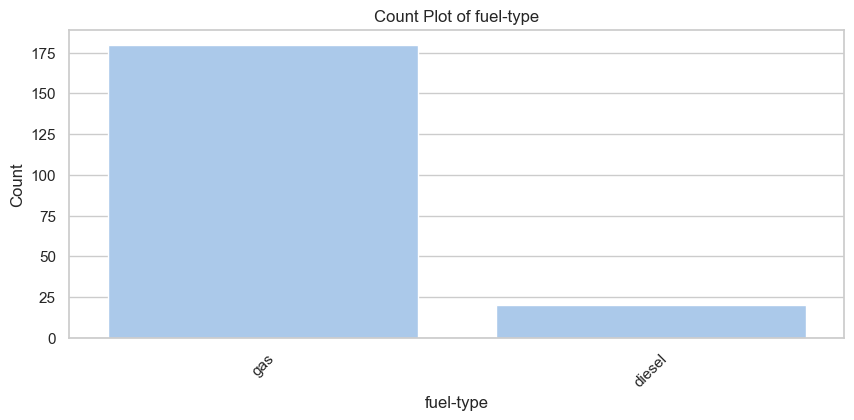

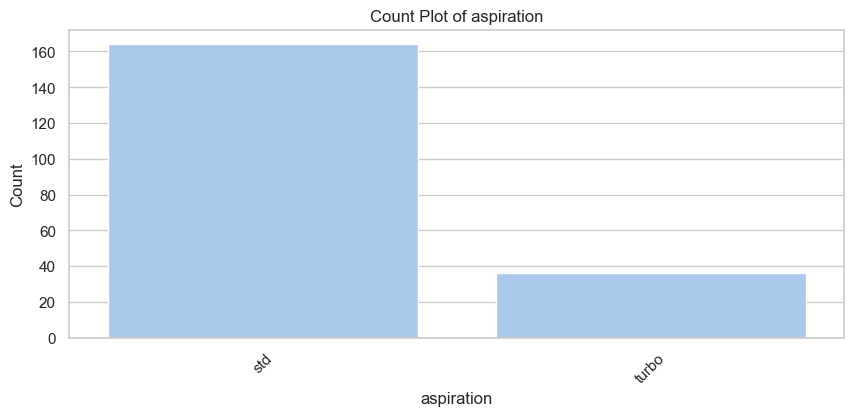

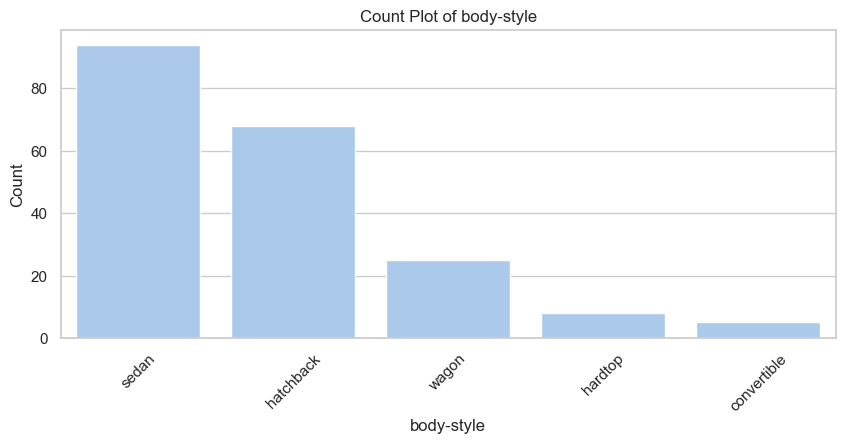

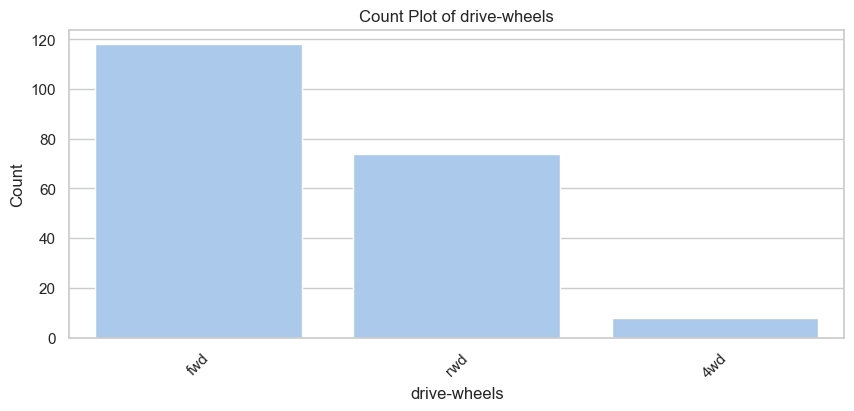

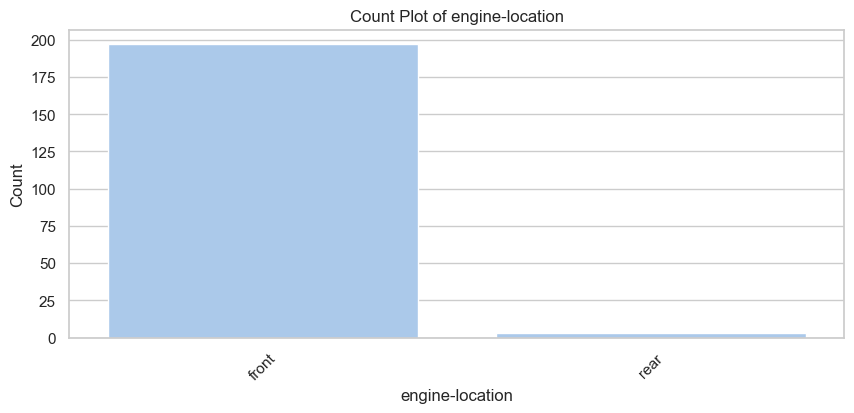

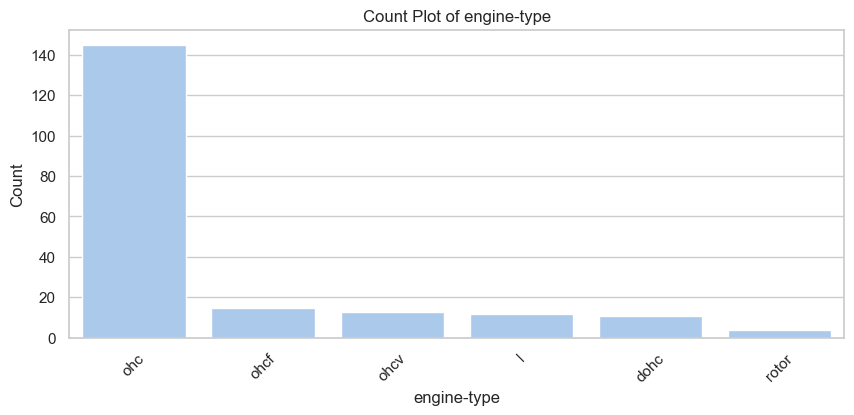

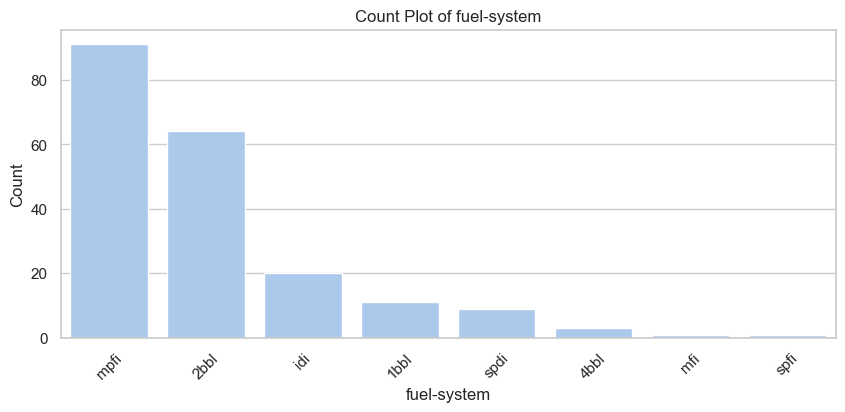

In [ ]:
# Set aesthetic parameters in seaborn
sns.set(style="whitegrid", palette="pastel")

# ✅ Univariate Analysis - Continuous Variables
continuous_cols = ['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height',
                   'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                   'peak-rpm', 'highway-mpg', 'price', 'city-mpg']

for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# ✅ Univariate Analysis - Categorical Variables
categorical_cols = ['make', 'fuel-type', 'aspiration', 'body-style',
                    'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Univariate EDA Insights

#### Univariate Analysis - Continues Variables
1. **symboling**  
Ordinal variable (-2 to 3). Represents insurance risk ratings. Values lean towards 0-2, suggesting most vehicles are moderate risk.

2. **Normalized-losses**
Cleaned numeric data, ranging between 65 and 256.
Filled missing values (36 entries) with median (~115).
Right-skewed, with higher losses being rarer.

3. **Num-of-doors**
Numeric: 2 or 4 doors.
Missing values imputed with mode (four doors).
About 55-60% are four-door vehicles, indicating a family-oriented market.

4. **wheel-base**
Most vehicles have a wheelbase 95-105 inches.
Longer wheelbases typically offer better ride comfort, potentially linked to higher-end models

5. **length**
Cars fall within 160-190 inches, with longer vehicles often being luxury or performance-oriented.
Very long vehicles (>200 inches) are outliers.

6. **width**
Mostly 64-66 inches wide.
Wider vehicles tend to correlate with higher curb-weight and better stability

7. **Height**
Mostly around 53-55 inches.
Lower vehicles (sports cars) vs. taller vehicles (SUV/hatchbacks).

8. **Curb-weight**
Range: 1500-4000 lbs.
Higher curb weight correlates with engine size, power, and price.
Heavier vehicles tend to be more expensive and powerful.

9. **Engine-size**
Clean and numeric.
Strong correlation with horsepower and price.
Larger engines (above 200 cc) appear in luxury and performance vehicles.

10. **Bore**
Now numeric and clean.
Bore typically 3.0-3.5 inches.
Larger bore values relate to more powerful engines.

11. **stroke**
Stroke ranges 3.0-3.5 inches.
No extreme outliers noted.

12. **Compression-ratio**
Mostly 8-10, with outliers up to 23.
Higher compression ratios indicate high-efficiency engines or performance tuning.
Low correlation with price.

13. **horsepower**
Clean numeric data.
Ranges from 48 HP to 262 HP.
Strongly correlates with engine-size, curb-weight, and price.
Cars with over 150 HP are high-end or sports vehicles.

14. **Peak-rpm**
Mostly 5000-5500 rpm.
Higher peak-rpm often found in sportier engines, but generally low correlation with price

15. **Highway-mpg**
Most vehicles achieve 25-35 mpg.
Higher mpg relates to fuel-efficient, budget-friendly cars, typically with lower price points.

16. **City-mpg**
Most vehicles fall in the 20-30 mpg range.
Similar pattern to highway-mpg, but city efficiency tends to be lower.
High city-mpg values often link to smaller, less powerful engines.

17. **Price**
Clean data now.
Wide price range: $5118 to $45400.
Right-skewed.
Cars priced above $30,000 are typically luxury, high engine-size, and high horsepower.


#### Univariate Analysis - Categorical Variables
1. - **make**: Toyota is the most common make, followed by Nissan and Mazda. Luxury brands like BMW and Porsche are fewer but represent high-end cars.

2. - **fuel-type**: Most cars use gasoline (~90%), while diesel cars (~10%) offer better fuel efficiency and are typically higher-priced.

3. - **aspiration**: Majority are standard (naturally aspirated), but turbocharged cars (15-20%) deliver better performance and higher prices.

4. - **body-style**: Sedans dominate (40%) due to practicality; hatchbacks are common too. Convertibles and hardtops are rare and generally more luxurious.

5. - **drive-wheels**: Front-wheel drive (65%) cars are most common for efficiency. Rear-wheel and 4-wheel drives are used in sports, luxury, and off-road vehicles.

6. - **engine-location**: 98% have front-engine placement, standard for consumer vehicles; rear-engine cars are rare, typically high-performance models.

7. - **engine-type**: Overhead Cam (OHC) engines dominate for efficiency, while DOHC and rotary engines appear in performance-focused cars.

8. - **fuel-system**: MPFI (Multi-point Fuel Injection) is most common for efficiency; other types like idi are found in diesel vehicles.

# Bivariate Analysis

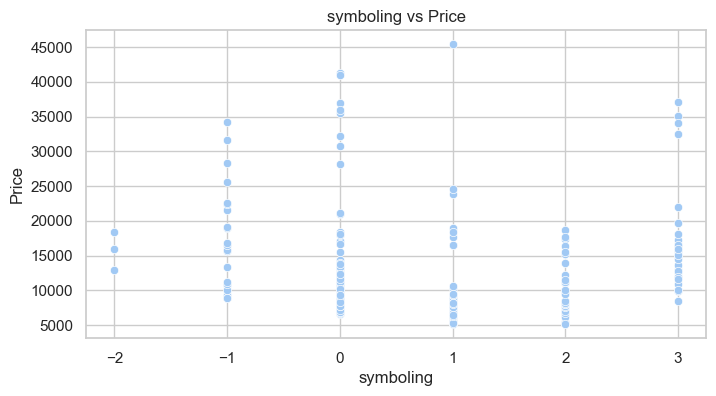

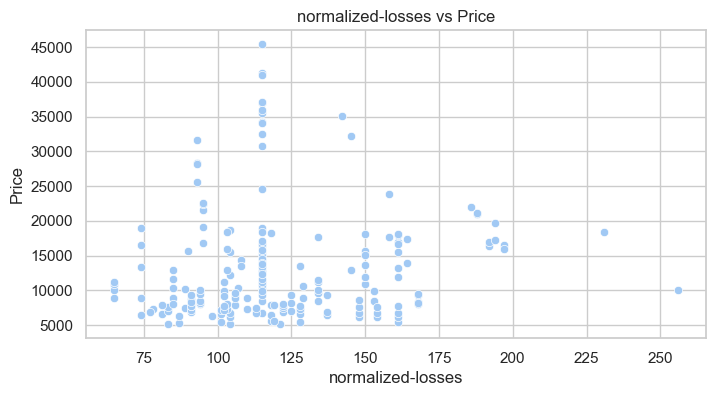

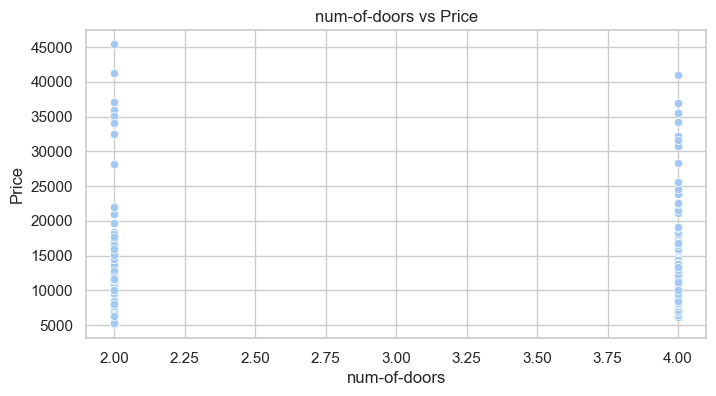

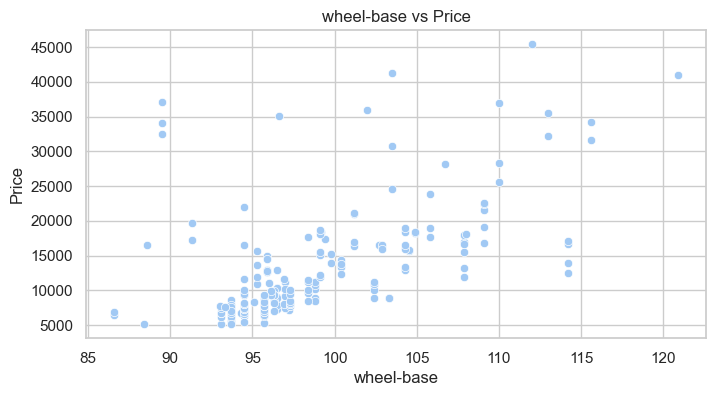

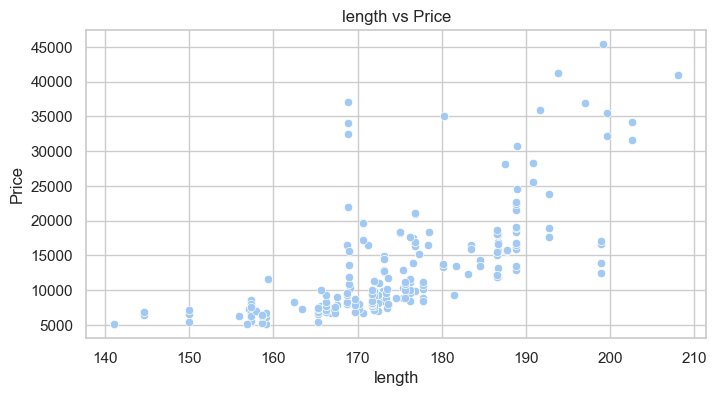

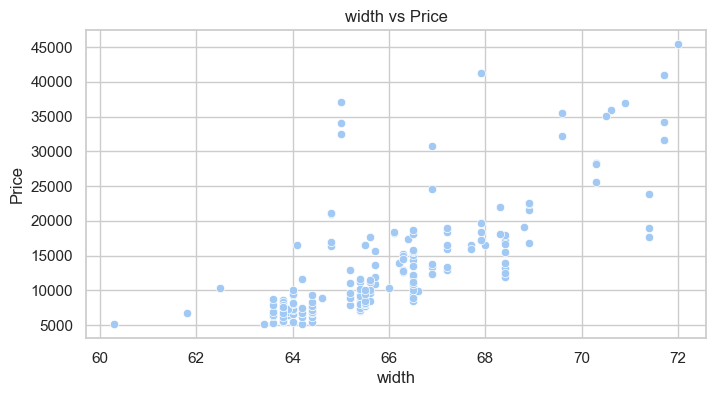

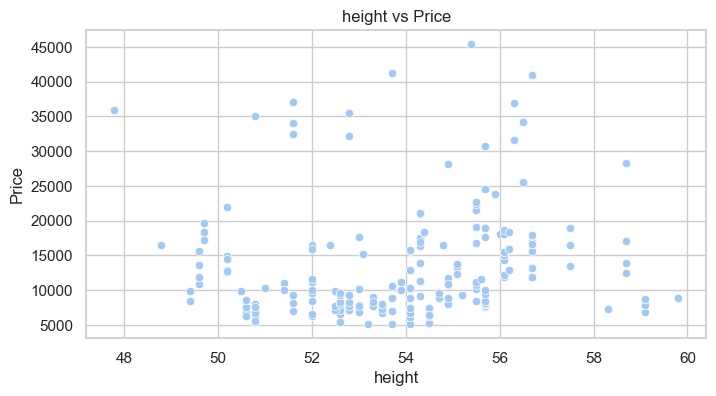

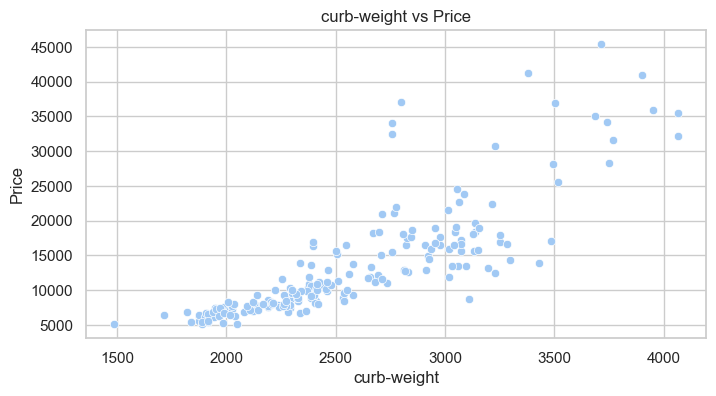

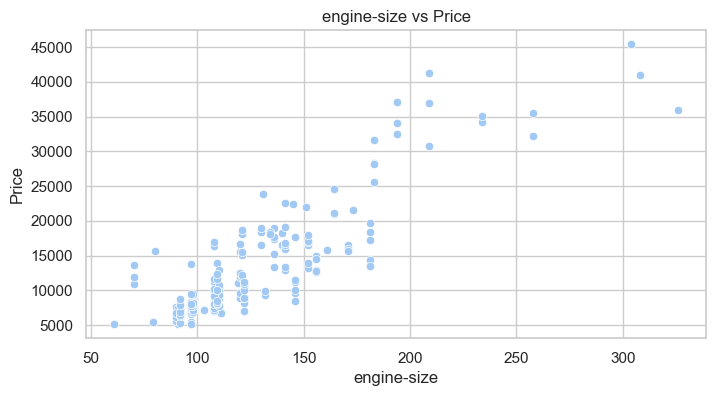

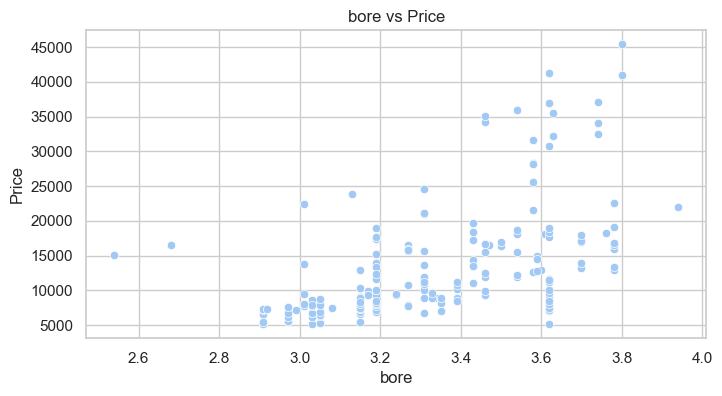

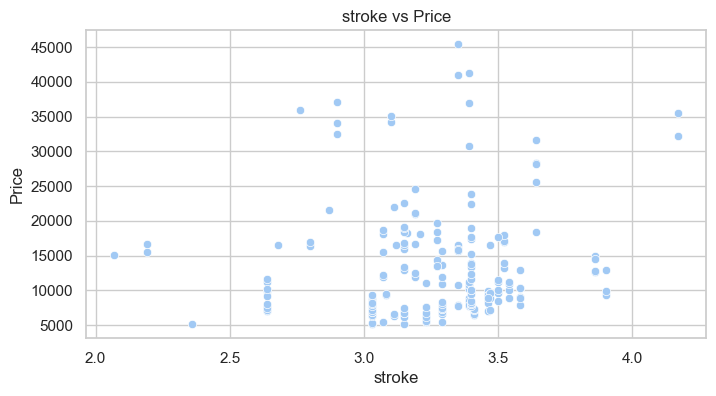

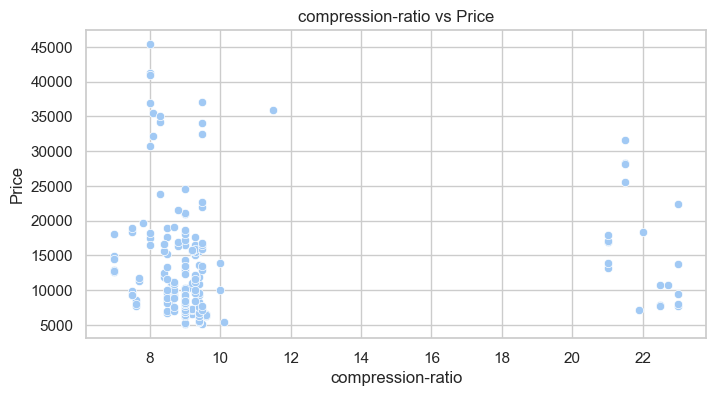

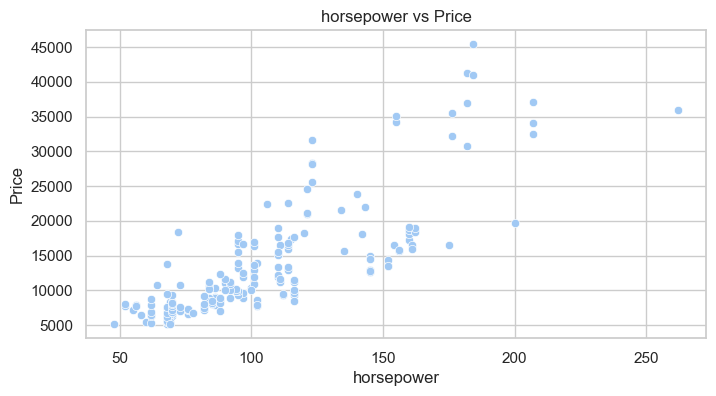

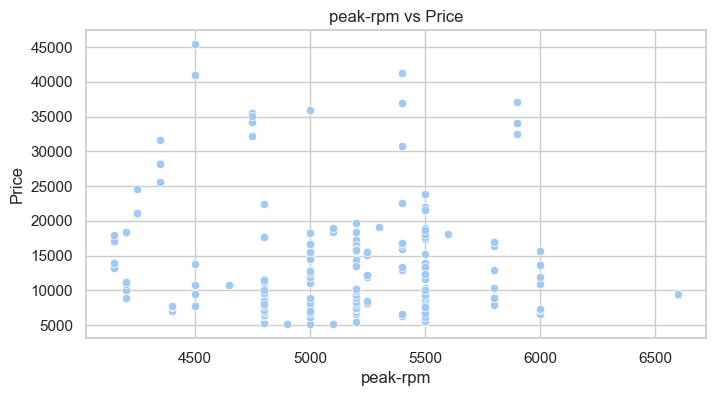

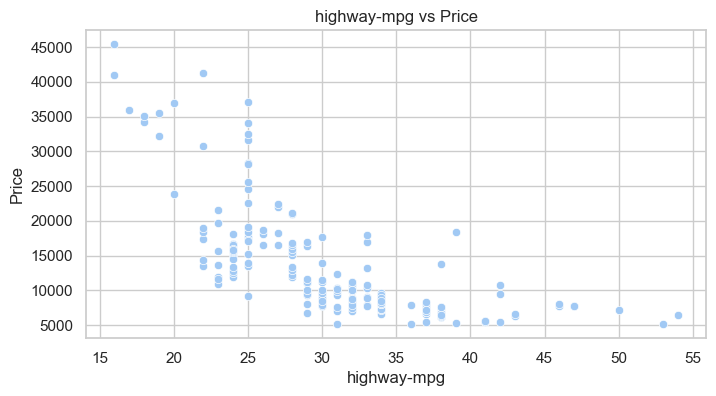

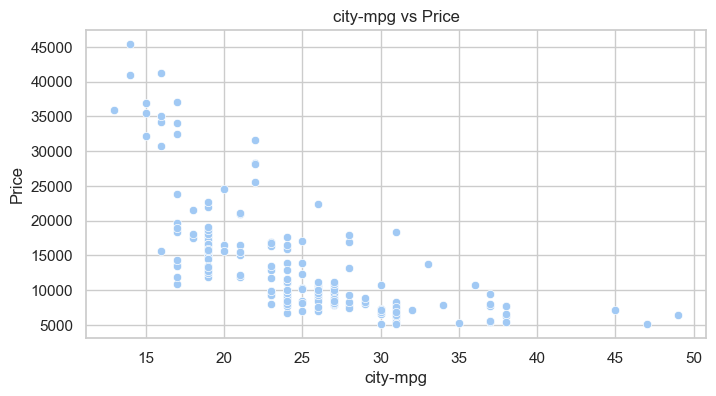

In [ ]:
# Scatter plots between independent variables and target (price)
for col in continuous_cols:
    if col != 'price':
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=df[col], y=df['price'])
        plt.title(f'{col} vs Price')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.show()


#### Bivariate Analysis - Continuous Variables vs Price

#### 1. **Symboling vs Price**
- No clear correlation observed.  
- Symboling is more about risk rating rather than a price indicator.

#### 2. **Normalized-Losses vs Price**
- Slight positive trend: higher normalized losses often align with higher-priced cars.  
- Indicates more expensive cars may have higher insurance risks.

#### 3. **Num-of-Doors vs Price**
- No significant trend; both 2-door and 4-door cars span across price ranges.  
- Door count isn't a strong indicator of car price in this dataset.

#### 4. **Wheel-Base vs Price**
- Positive correlation: longer wheelbase tends to align with higher prices.  
- Longer wheelbase suggests larger, more premium vehicles.

#### 5. **Length vs Price**
- Strong positive correlation: longer cars generally have higher prices.  
- Reflects larger vehicle size, often indicating higher-end models.

#### 6. **Width vs Price**
- Positive relationship: wider cars tend to be more expensive.  
- Suggests increased comfort and performance in wider vehicles.

#### 7. **Height vs Price**
- Weak or no clear relationship with price.  
- Height alone doesn't significantly impact car pricing.

#### 8. **Curb-Weight vs Price**
- Strong positive correlation: heavier cars are generally more expensive.  
- Heavier weight often means more features, safety, and luxury components.

#### 9. **Engine-Size vs Price**
- Very strong positive correlation: larger engines result in higher prices.  
- Reflects better performance and higher segment cars.

#### 10. **Bore vs Price**
- Moderate positive correlation: cars with larger bore tend to have higher prices.  
- Indicates a link to engine capacity and performance.

#### 11. **Stroke vs Price**
- Weak or no clear correlation with price.  
- Stroke length doesn't directly impact car prices in this datase.

#### 12. **Compression-Ratio vs Price**
- Weak relationship, but some higher compression-ratio engines appear in expensive cars.  
- High compression ratios can suggest performance or efficiency improvements.

#### 13. **Horsepower vs Price**
- Strong positive correlation: higher horsepower cars are generally more expensive.  
- Indicates performance as a major price driver.

#### 14. **Peak-RPM vs Price**
- No clear trend with price.  
- Peak RPM values are scattered across price points.

#### 15. **Highway-MPG vs Price**
- Negative correlation: higher MPG (more fuel efficiency) often relates to lower car prices.  
- Luxury and high-performance cars generally have lower MPG.

#### 16. **City-MPG vs Price**
- Similar to highway-MPG, a negative correlation: higher city MPG often found in cheaper cars. - Fuel-efficient cars tend to be lower-priced models.

#### Summary Insights:
**Strongly Positively Correlated with Price**:  
  - **Engine-size, Horsepower, Curb-weight, Wheel-base, Length, Width**  

**Weak or No Correlation**:  
- **Height, Peak-RPM, Stroke, Num-of-doors**  

**Negative Correlation**:  
- **City-MPG, Highway-MPG**

#### Bivariate Price Analysis by Categorical Features

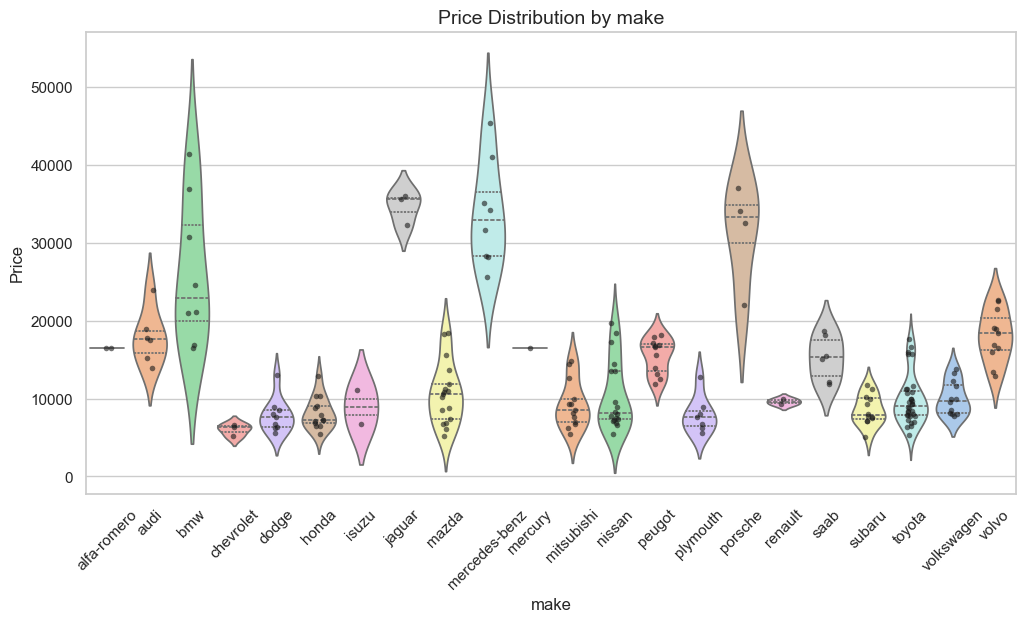

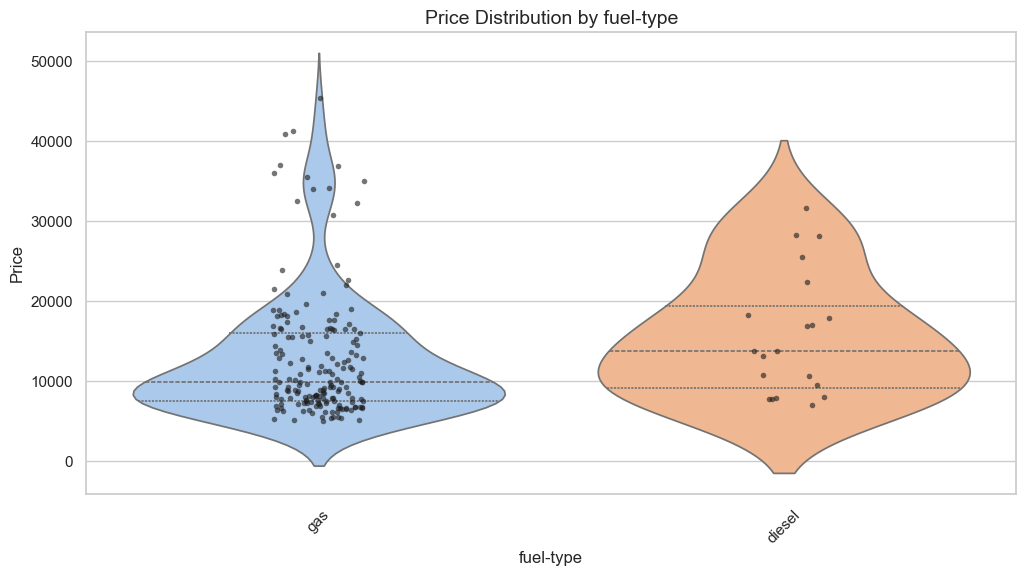

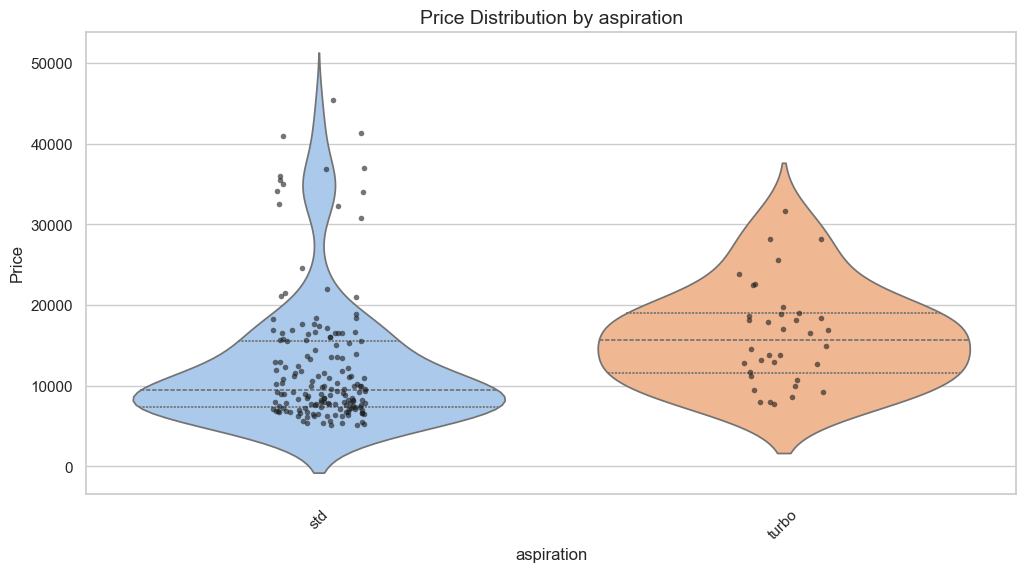

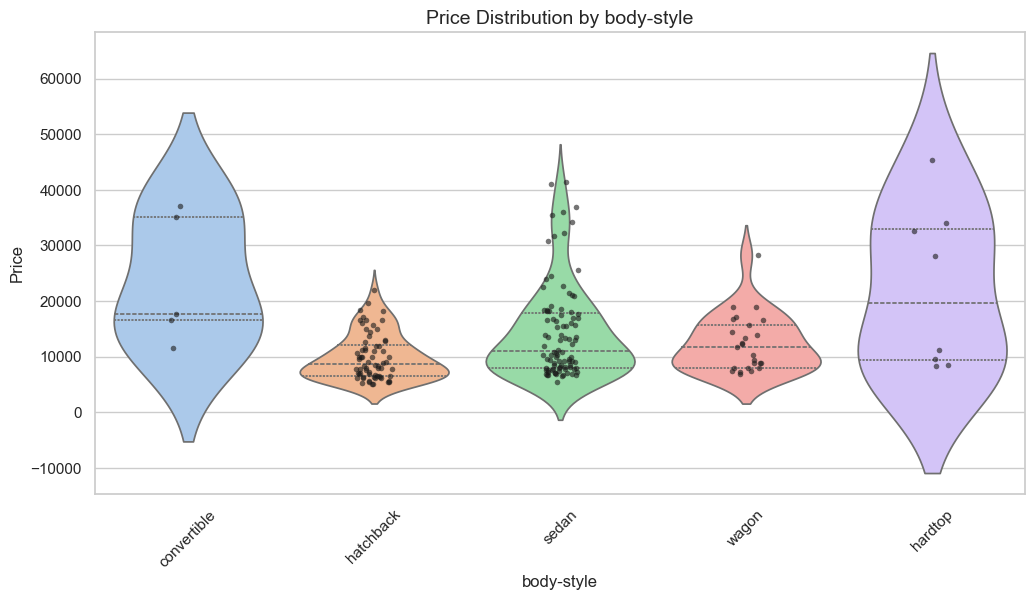

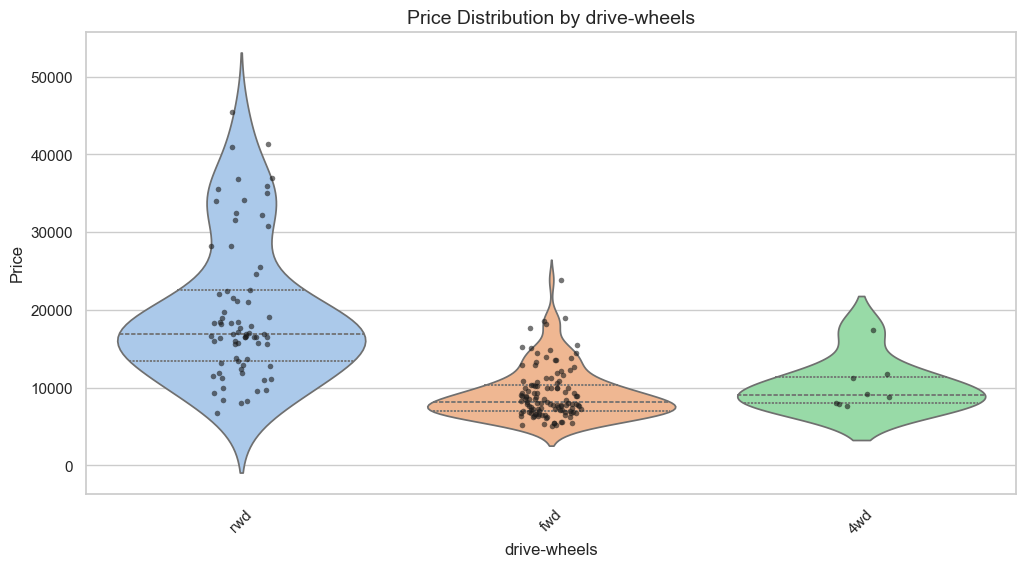

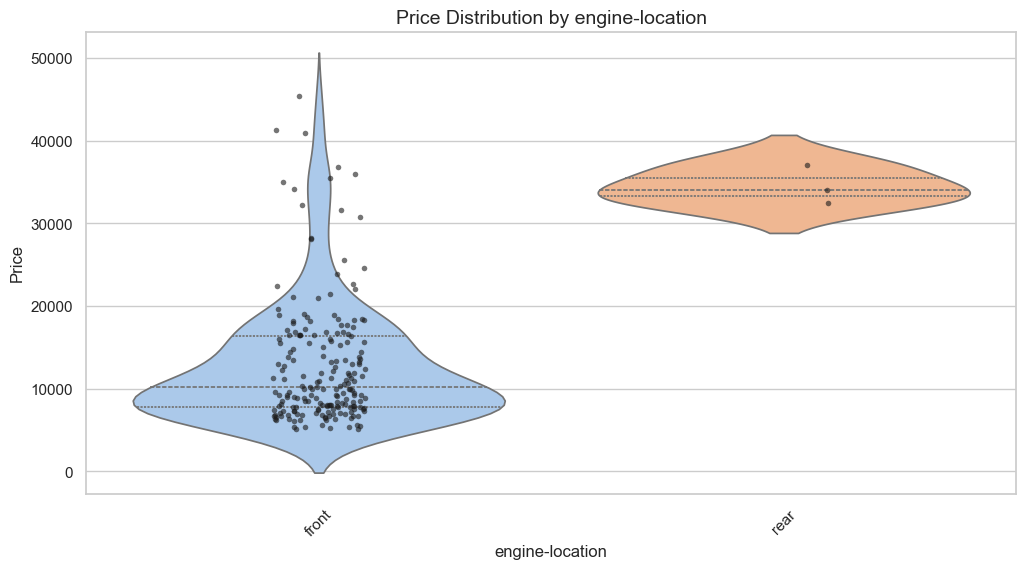

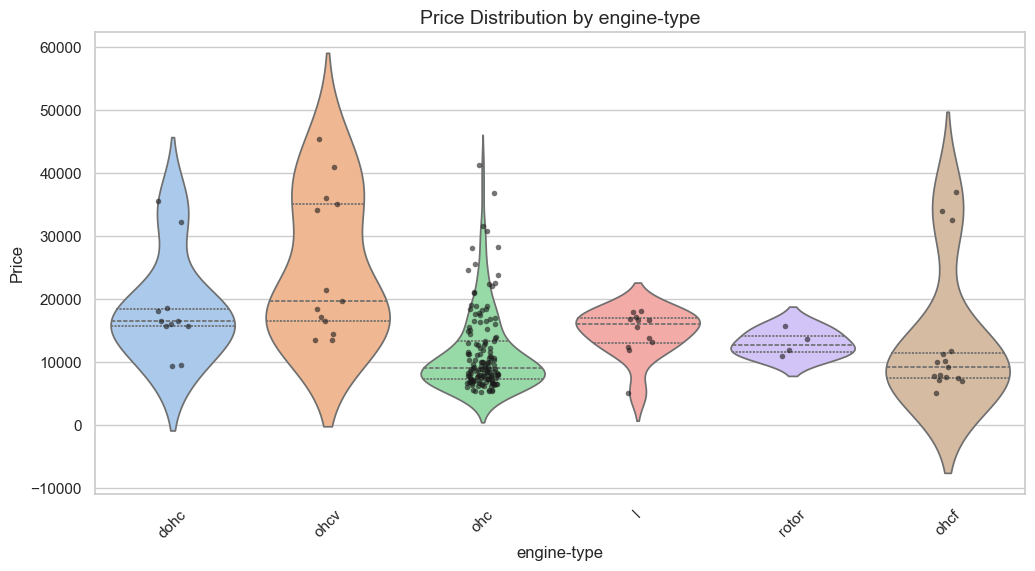

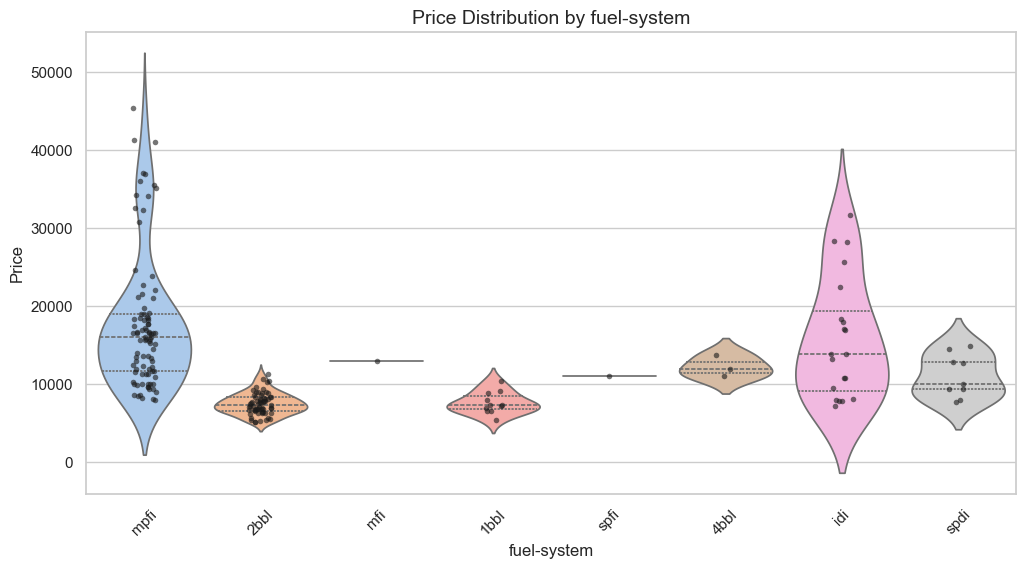

In [ ]:
# Define the list of categorical columns
categorical_cols = ['make', 'fuel-type', 'aspiration', 'body-style',
                    'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']

# Plotting Violin Plots with Strip Plot Overlay
for col in categorical_cols:
    plt.figure(figsize=(12, 6))

    # Violin plot with quartile indicators
    sns.violinplot(
        x=df[col],
        y=df['price'],
        inner='quartile',
        palette='pastel'
    )

    # Overlaying strip plot for individual data points
    sns.stripplot(
        x=df[col],
        y=df['price'],
        color='k',     # black dots
        size=4,
        jitter=True,
        alpha=0.6
    )

    plt.title(f'Price Distribution by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


#### Bivariate Analysis - Violin & Strip Plots Insights (Categorical Variables vs Price)

- **Make**: Premium brands like Jaguar, BMW, and Porsche show significantly higher price distributions. Brands like Toyota and Nissan offer more budget-friendly vehicles with tighter price spreads.

- **Fuel-Type**: Diesel vehicles tend to be priced higher than gasoline counterparts, reflecting their efficiency and premium positioning in the market.

- **Aspiration**: Turbocharged engines are associated with higher-priced models, likely due to enhanced performance and sporty features.

- **Body-Style**: Convertibles and hardtops exhibit higher price ranges, whereas sedans and hatchbacks dominate the lower price spectrum, catering to the mass market.

- **Drive-Wheels**: Rear-wheel drive (rwd) vehicles show higher price distributions, common in luxury and performance-oriented cars, while front-wheel drive (fwd) vehicles are more affordable.

- **Engine-Location**: Cars with rear engines have substantially higher prices, typically associated with high-performance sports cars.

- **Engine-Type**: DOHC and rotor engines are present in higher-priced vehicles, while OHC engines are common in more affordable cars.

- **Fuel-System**: MPFI and IDI fuel systems are found in higher-end models, whereas simpler systems like 2bbl and 1bbl are associated with lower prices.


# Multivariate Analysis

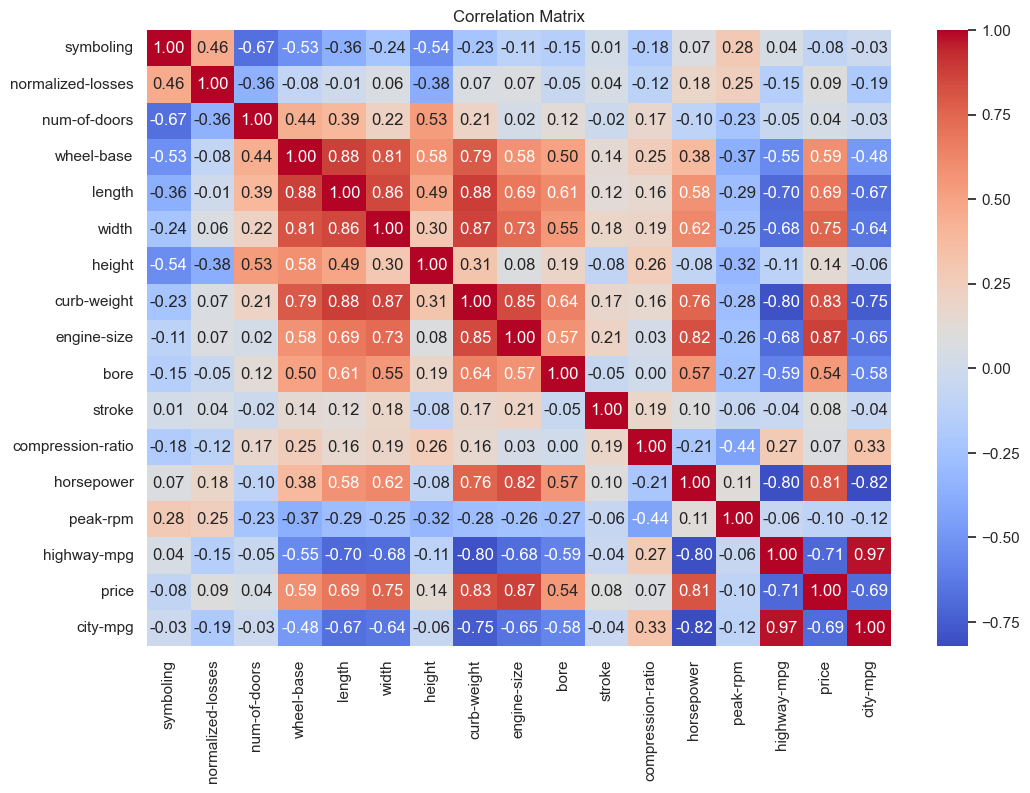

In [ ]:
# Compute correlation matrix
corr_matrix = df[continuous_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Multivariate Analysis - Correlation Heatmap Insights

- The heatmap reveals a **strong negative correlation** between `price` and both `city-mpg` (-0.69) and `highway-mpg` (-0.71), indicating that higher mileage vehicles tend to be lower priced.
  
- **Curb-weight**, **engine-size**, and **horsepower** show **strong positive correlations** with `price`, implying that larger, more powerful engines and heavier cars generally cost more.
  
- `City-mpg` and `highway-mpg` have a **very high positive correlation** (0.95), meaning they provide **redundant information**.

---

### ✅ Action Taken
- Due to the **high correlation (0.95)** between `city-mpg` and `highway-mpg`, the `city-mpg` column was **dropped** to avoid **multicollinearity**, improving the model's efficiency and preventing overfitting.



In [ ]:
# Drop 'city-mpg' column due to high correlation with 'highway-mpg'
df.drop(columns=['city-mpg'], inplace=True)

# Confirm it's dropped
print(df.columns)


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'highway-mpg', 'price'],
      dtype='object')


### Feature Correlation Analysis with Price

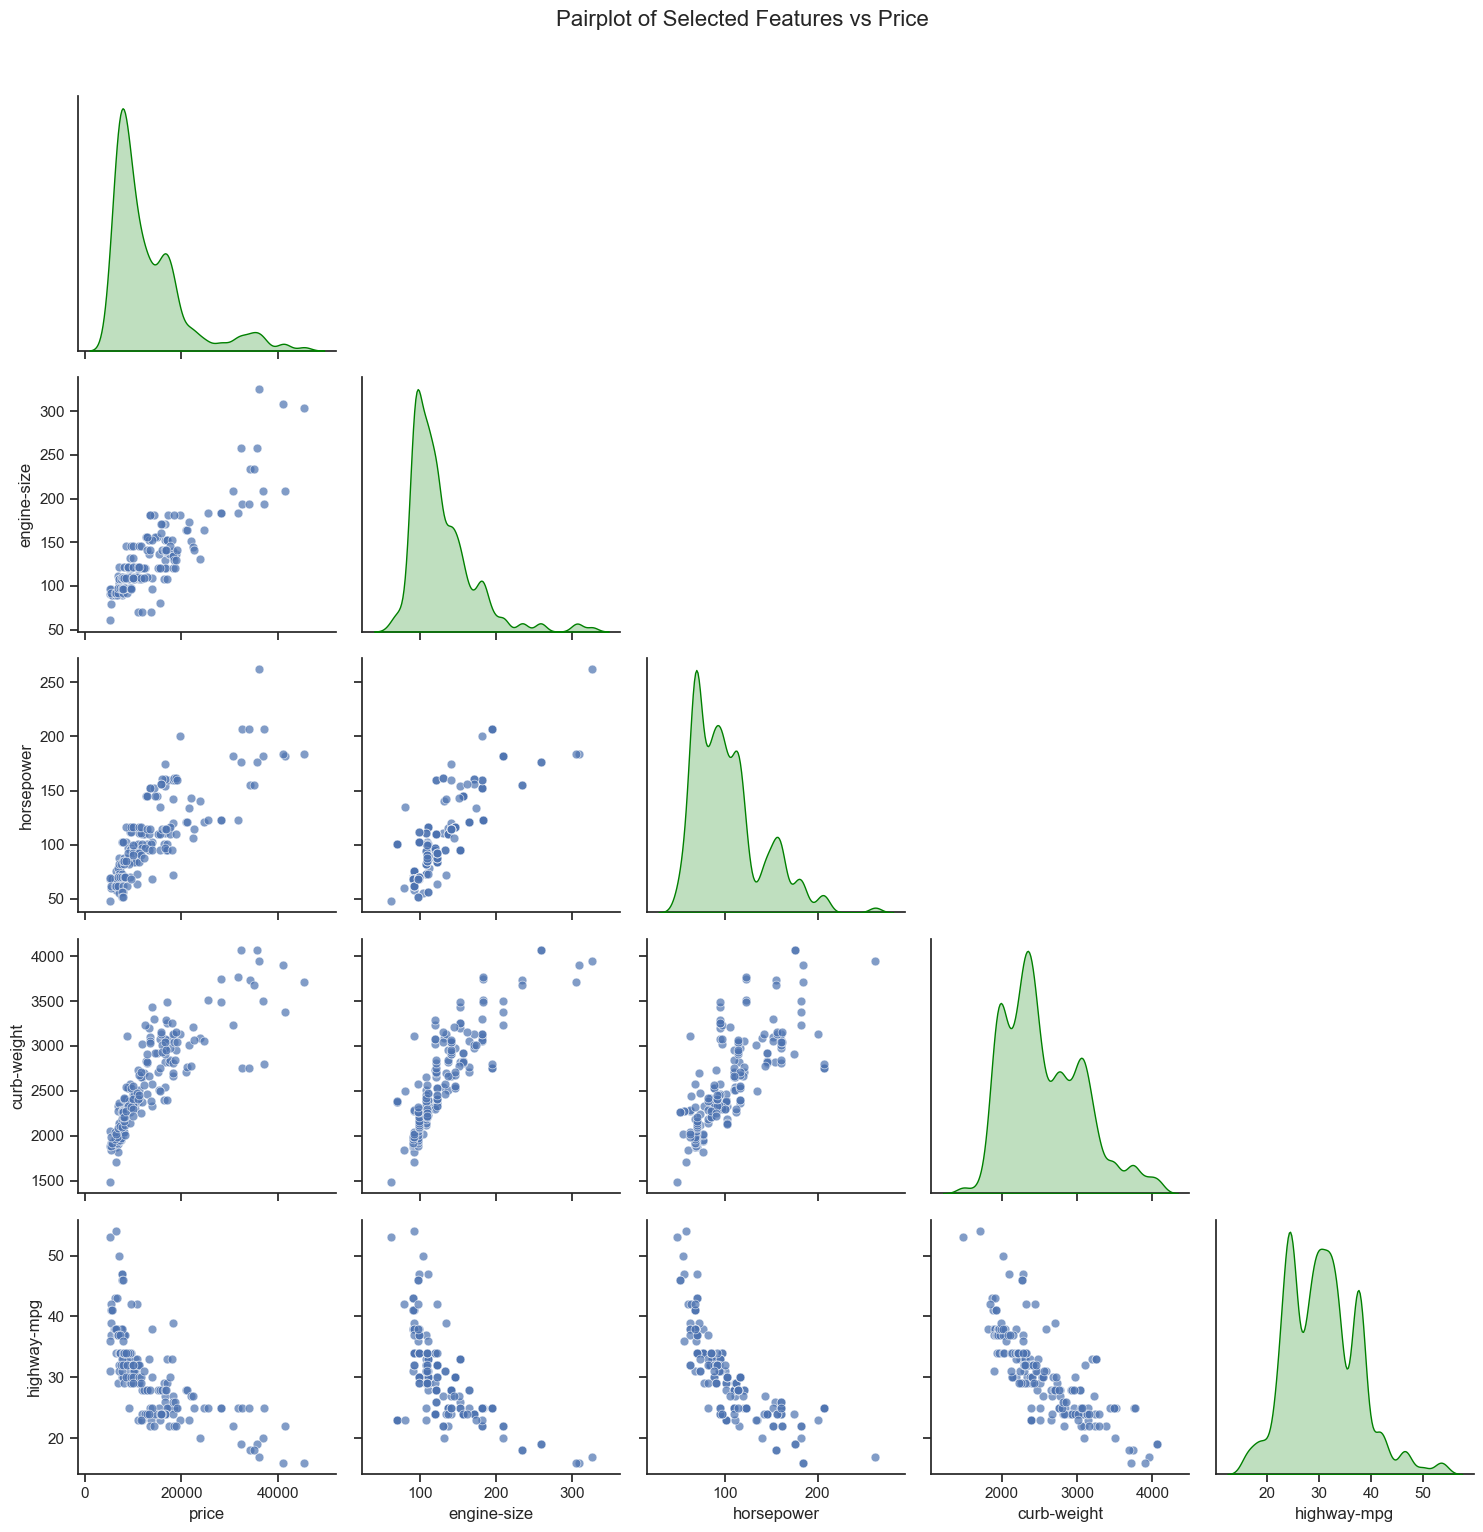

In [ ]:
# Set a clean and modern theme
sns.set_theme(style="ticks")

# Define the selected columns
selected_cols = ['price', 'engine-size', 'horsepower', 'curb-weight', 'highway-mpg']

# Create a custom color palette
custom_palette = sns.color_palette("viridis", as_cmap=True)

# Initialize the pairplot with advanced styling
pairplot = sns.pairplot(
    df[selected_cols],
    diag_kind='kde',                          # Smooth density on diagonal
    kind='scatter',                           # Scatter for off-diagonal
    palette='viridis',                        # Modern color palette
    corner=True,                              # Lower triangle only
    height=3,                                 # Plot size
    plot_kws={
        'alpha': 0.7,                         # Slight transparency
        's': 40,                              # Marker size
        'edgecolor': 'w'                      # White edges for contrast
    },
    diag_kws={
        'shade': True,
        'bw_adjust': 0.5,
        'color': 'green'                      # Diagonal color
    }
)

# Adjust titles and labels
pairplot.fig.suptitle('Pairplot of Selected Features vs Price', fontsize=16, y=1.02)
pairplot.fig.tight_layout()

# Use tick marks instead of grid lines
sns.despine()

plt.show()


#### Insights from Pairplot (Multivariate Analysis)

- **Engine-size**, **horsepower**, and **curb-weight** show a **strong positive correlation** with **price**. As these features increase, the price of the car tends to rise.
  
- **Highway-mpg** displays a **negative correlation** with **price**, indicating that cars with higher fuel efficiency typically have lower prices.

- The pairplot reveals **linear relationships** between several features and price, suggesting they are important predictors in price estimation.


#### Boxplot: Car Price Variation by Drive Wheels and Body Style

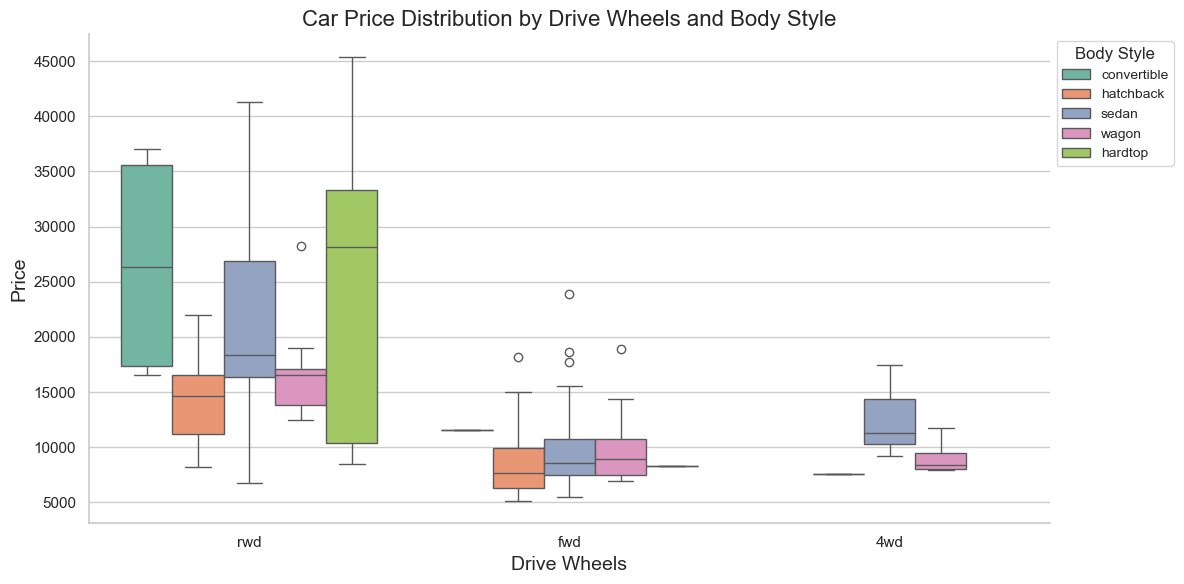

In [ ]:
# Set theme for a clean and modern look
sns.set_theme(style="whitegrid")

# Set figure size
plt.figure(figsize=(12, 6))

# Create the boxplot with a clear, colorblind-friendly palette
sns.boxplot(
    x='drive-wheels',
    y='price',
    hue='body-style',
    data=df,
    palette='Set2'
)

# Add a title and customize fonts for clarity
plt.title('Car Price Distribution by Drive Wheels and Body Style', fontsize=16)
plt.xlabel('Drive Wheels', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Improve legend location and title
plt.legend(title='Body Style', title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Remove top and right spines for a cleaner look
sns.despine()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



##### What This Plot Shows:

**This boxplot visualizes how car prices vary based on two categorical variables:**

    Drive Wheels (drive-wheels): fwd, rwd, 4wd
    Body Style (body-style): sedan, hatchback, convertible, etc.





- **Rear-wheel drive (rwd)** vehicles generally have the **highest prices**, especially **convertibles** and **hardtops**, indicating they belong to the luxury and sports car segments.
  
- **Front-wheel drive (fwd)** cars, particularly **sedans** and **hatchbacks**, have **lower prices** with less variation, suggesting they are mostly economical and mass-market vehicles.

- **Four-wheel drive (4wd)** vehicles show **moderate price ranges**, likely representing SUVs or off-road vehicles, where **price variation** depends on the body style.

- There is a **clear interaction** between `drive-wheels` and `body-style` that impacts the **pricing structure**, making these important features for predicting car prices.


# STEP 7 : DATA PREPROCESSING

## Missing Value Imputation

In [ ]:
# Define numerical columns with NaN values
numerical_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']

# Create an imputer for numerical data using median
num_imputer = SimpleImputer(strategy='median')

# Apply imputation to numerical columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Verify no missing values remain in numerical columns
print("\nMissing Values in Numerical Columns After Imputation:\n",df[numerical_cols].isnull().sum())


Missing Values in Numerical Columns After Imputation:
 normalized-losses    0
bore                 0
stroke               0
horsepower           0
peak-rpm             0
dtype: int64


In [ ]:
# Define categorical column with NaN values
categorical_col = ['num-of-doors']

# Create an imputer for categorical data using mode (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to categorical column
df[categorical_col] = cat_imputer.fit_transform(df[categorical_col])

# Verify no missing values remain in categorical column
print("\nMissing Values in Categorical Column After Imputation:\n",df[categorical_col].isnull().sum())


Missing Values in Categorical Column After Imputation:
 num-of-doors    0
dtype: int64


## Duplicate Data Detections

In [ ]:
# check for duplicates
df.duplicated().sum()

0

## Visualizing Outliers

### Outlier Identification in Numerical Columns Using Boxplots

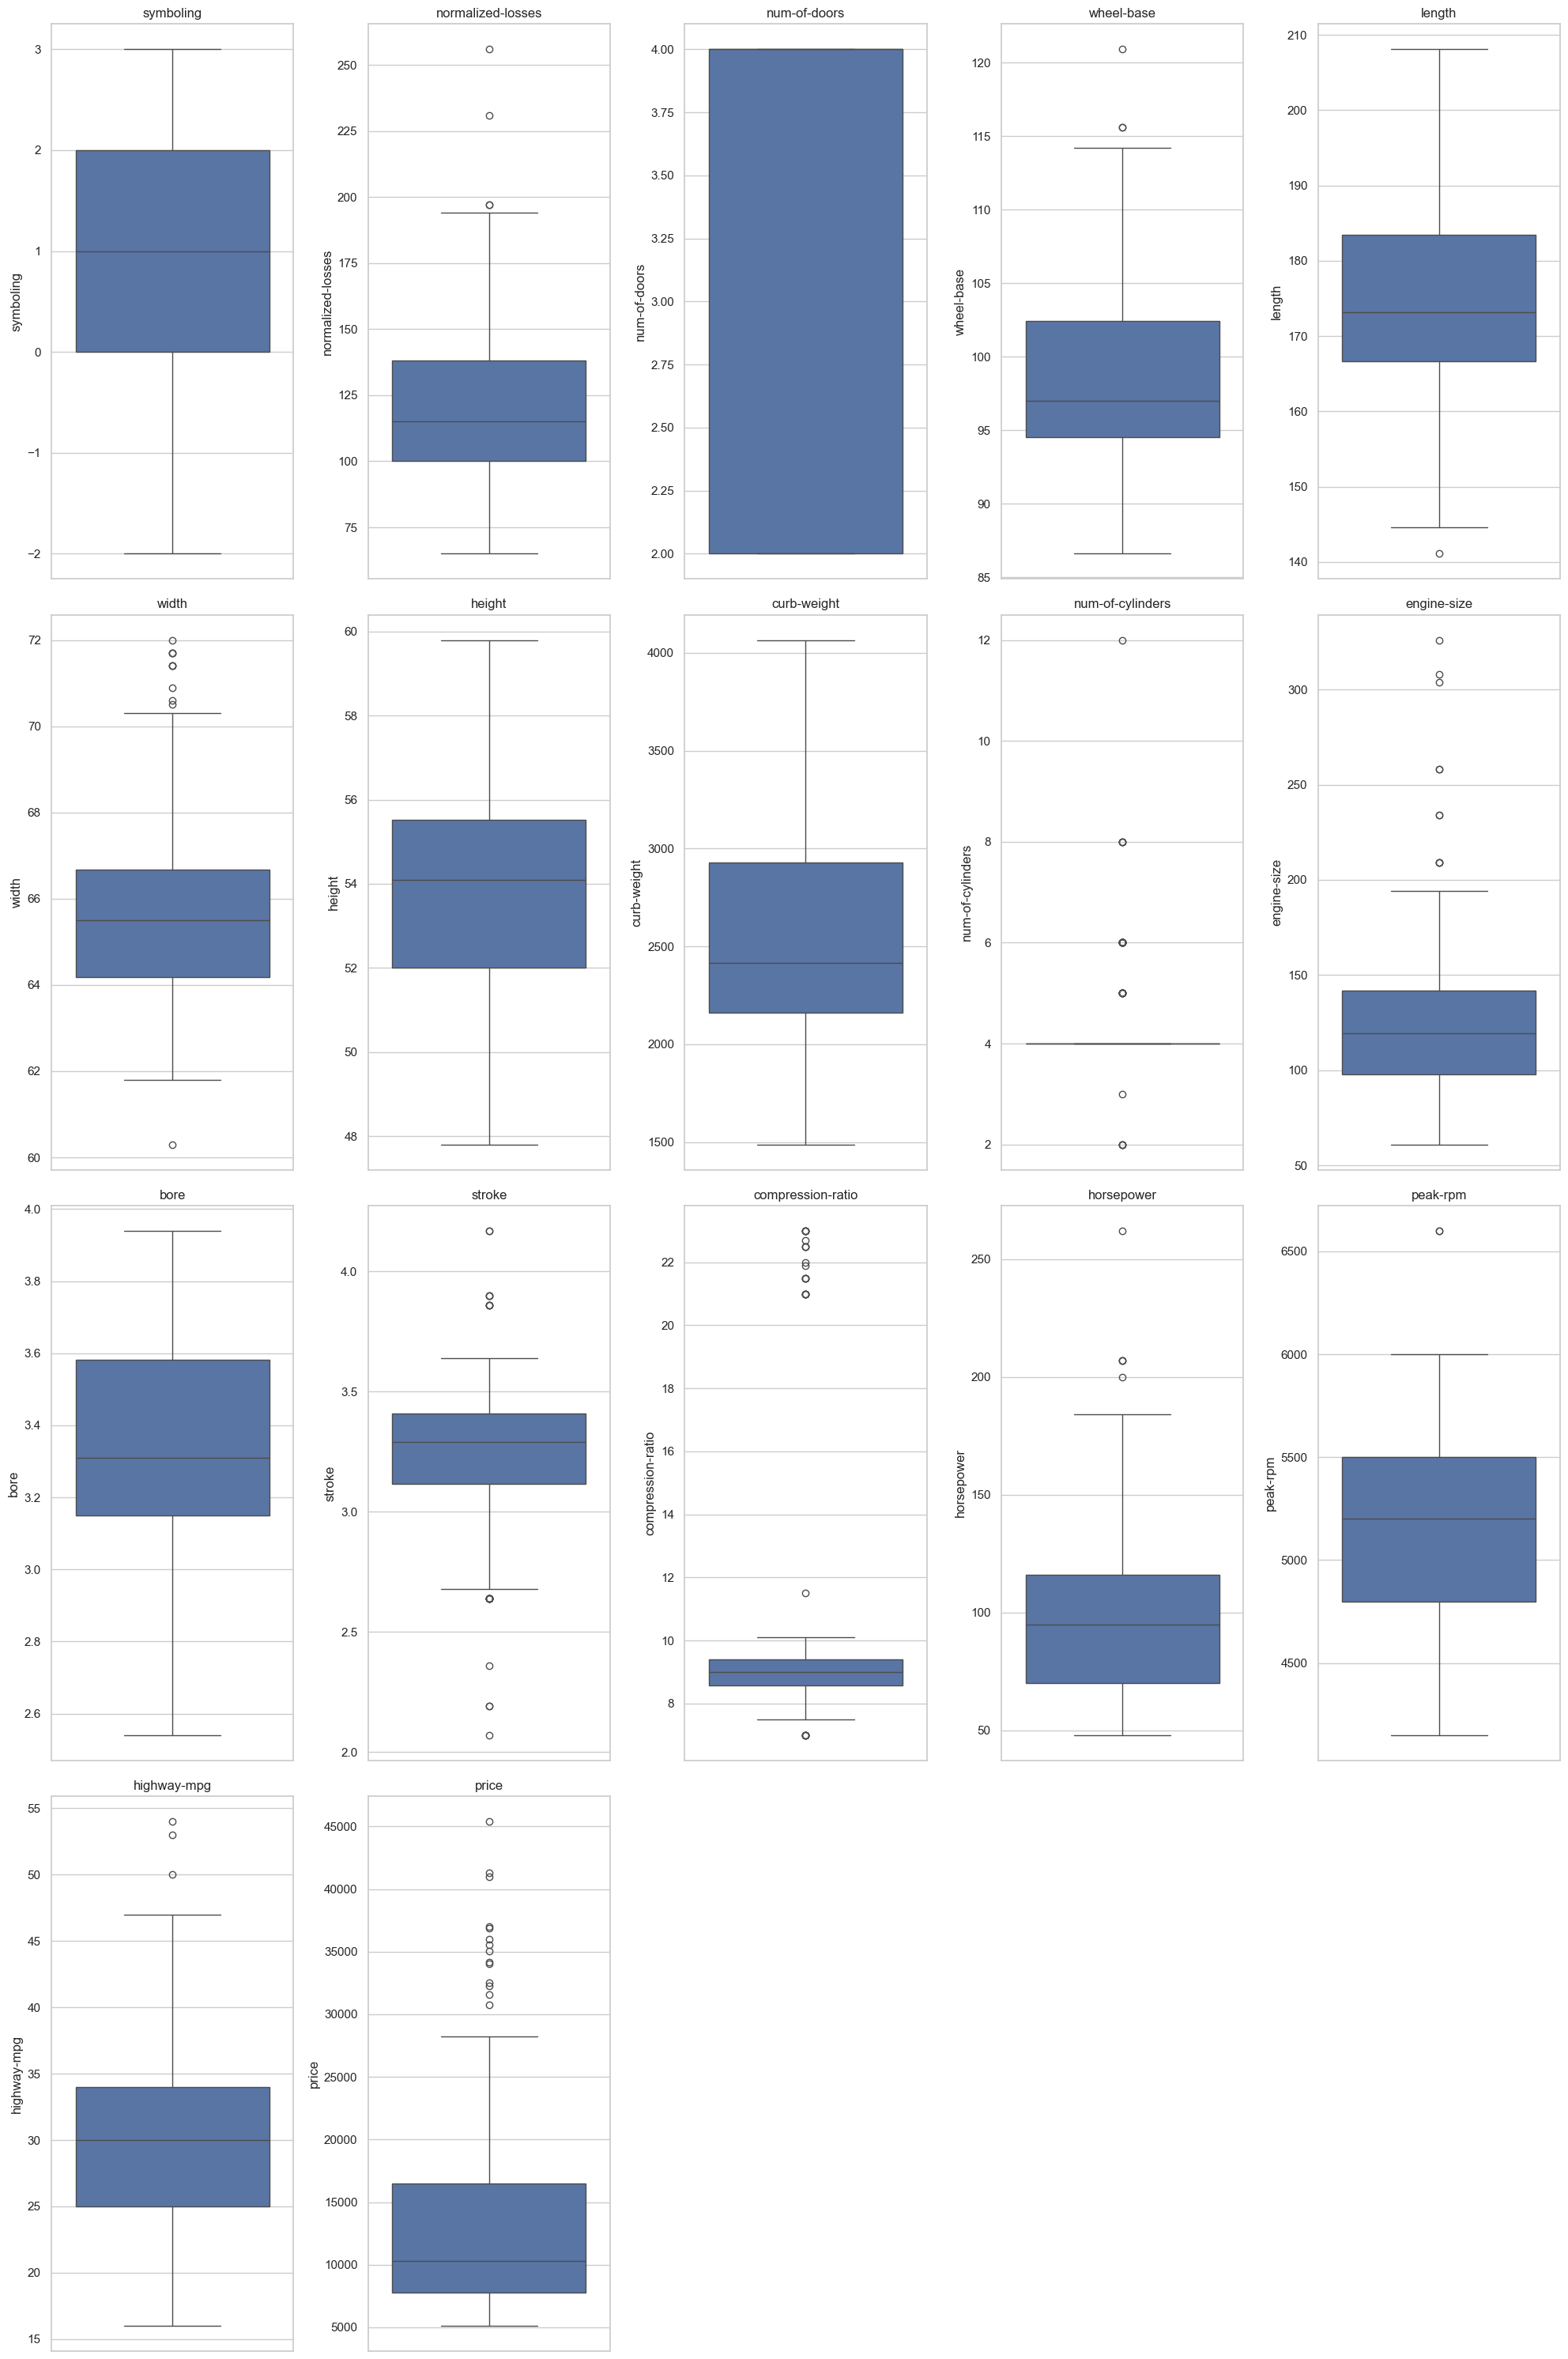

In [ ]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(20, 30))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 5 + 1, 5, i + 1)  # Adjust rows dynamically
    sns.boxplot(data=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

There are noticeable outliers in several numerical features, including `normalized-losses`, `engine-size`, `horsepower`, and `price`, indicating the presence of rare or high-end vehicles. Features like `wheel-base`, `length`, and `width` show a few extreme values, which could represent larger luxury cars or SUVs. The `compression-ratio` and `stroke` columns also have some outliers, suggesting unique engine designs or potential data inconsistencies. Additionally, `highway-mpg` and `peak-rpm` show outliers, possibly reflecting highly fuel-efficient models or high-performance engines. Overall, most features exhibit a central clustering of values with a few extreme data points that need careful handling in further analysis or modeling.

In [ ]:
# Identify numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'highway-mpg', 'price'],
      dtype='object')

#### Outlier Treatment in Numerical Columns Using IQR Capping Method

In [ ]:
# Identify numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Function to handle outliers using the IQR method
def handle_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if column has outliers
        if df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] > 0:
            print(f"Handling outliers in column: {col}")

            # Apply capping method
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Apply function to all numerical columns
df = handle_outliers_iqr(df, numeric_cols)

# Verify by checking the summary statistics
df.describe()

Handling outliers in column: normalized-losses
Handling outliers in column: wheel-base
Handling outliers in column: length
Handling outliers in column: width
Handling outliers in column: num-of-cylinders
Handling outliers in column: engine-size
Handling outliers in column: stroke
Handling outliers in column: compression-ratio
Handling outliers in column: horsepower
Handling outliers in column: peak-rpm
Handling outliers in column: highway-mpg
Handling outliers in column: price


,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,0.830000,120.240000,3.150000,98.801250,174.229688,65.853375,53.791500,2555.705000,4.0,124.533750,3.329600,3.267900,9.039162,102.485000,5118.50000,30.632500,12759.251250
std,1.248557,30.594752,0.991167,5.896655,12.342604,1.987179,2.428449,518.594552,0.0,33.933235,0.268577,0.272269,0.801696,35.142349,477.78041,6.615324,6676.972729
min,-2.000000,65.000000,2.000000,86.600000,141.437500,60.425000,47.800000,1488.000000,4.0,61.000000,2.540000,2.678750,7.337500,48.000000,4150.00000,16.000000,5118.000000
25%,0.000000,100.250000,2.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,4.0,97.750000,3.150000,3.117500,8.575000,70.000000,4800.00000,25.000000,7775.000000
50%,1.000000,115.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.0,119.500000,3.310000,3.290000,9.000000,95.000000,5200.00000,30.000000,10270.000000
75%,2.000000,138.250000,4.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,4.0,142.000000,3.582500,3.410000,9.400000,116.000000,5500.00000,34.000000,16500.750000
max,3.000000,195.250000,4.000000,114.250000,208.100000,70.425000,59.800000,4066.000000,4.0,208.375000,3.940000,3.848750,10.637500,185.000000,6550.00000,47.500000,29589.375000


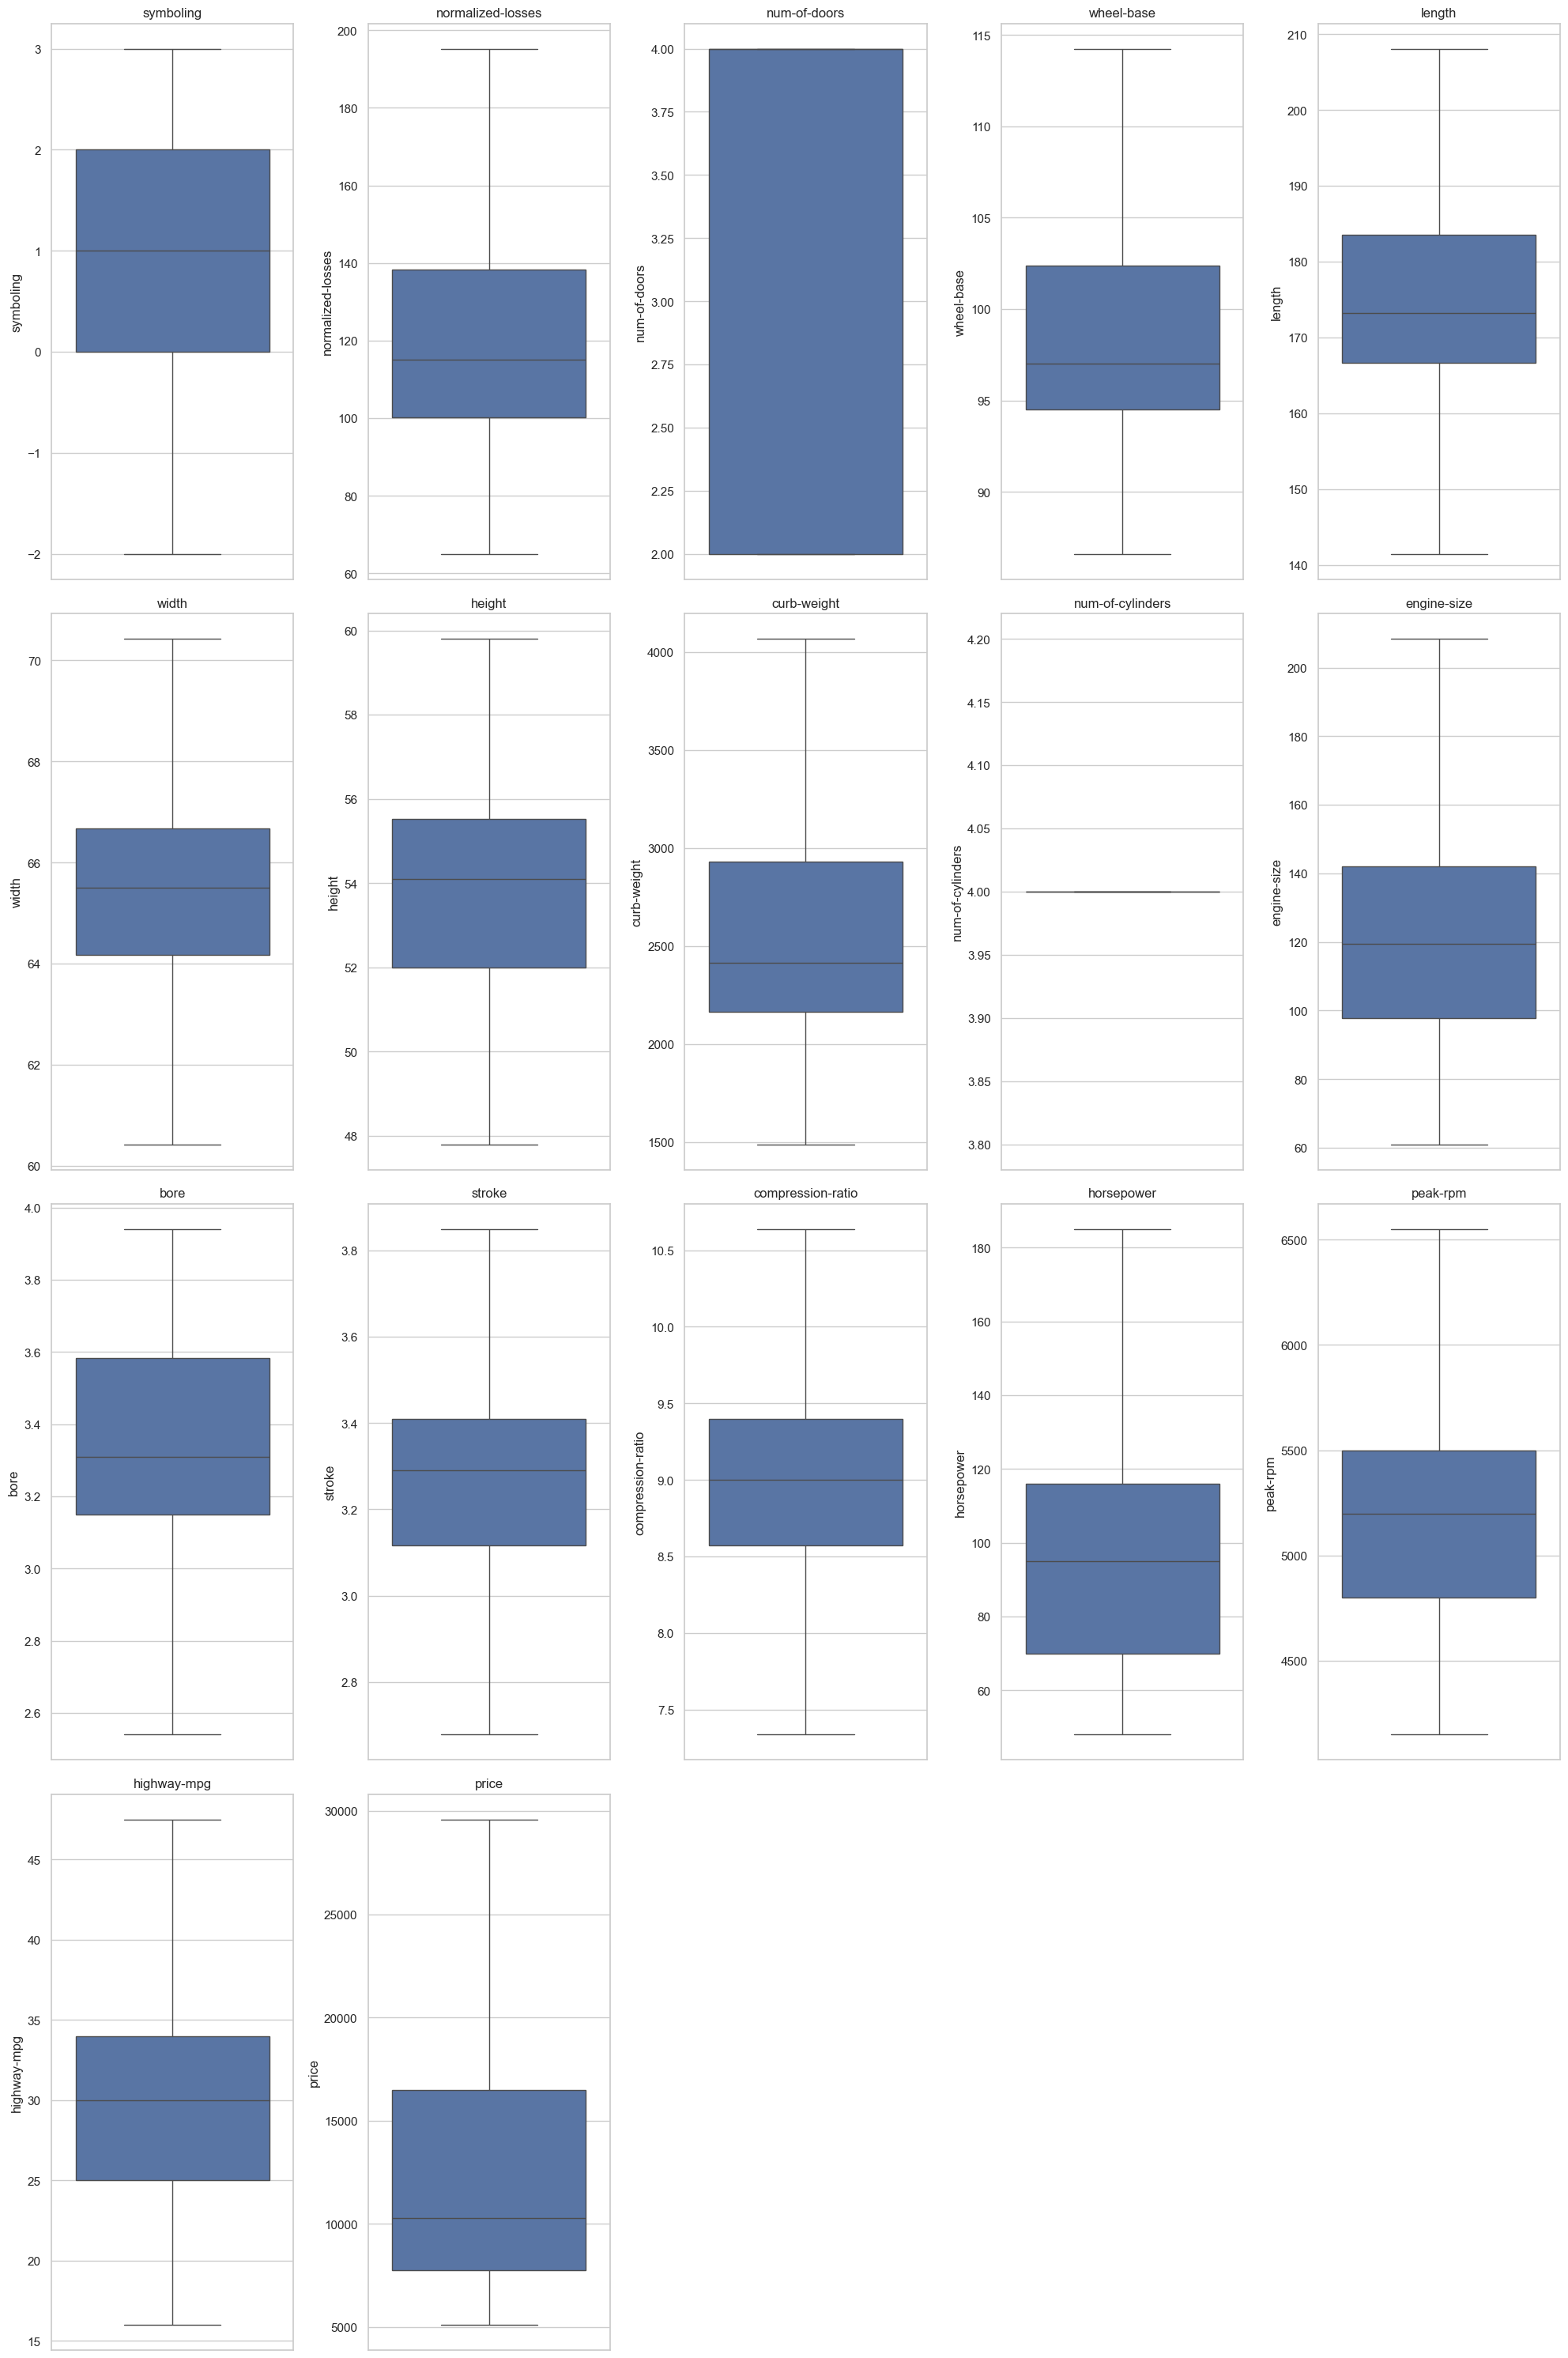

In [ ]:
plt.figure(figsize=(20, 30))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 5 + 1, 5, i + 1)
    sns.boxplot(data=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

##### There are no outliers remain in numeric columns

### Visualizing Categorical Data Distributions

In [ ]:
categorical_cols

['make',
 'fuel-type',
 'aspiration',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'fuel-system']

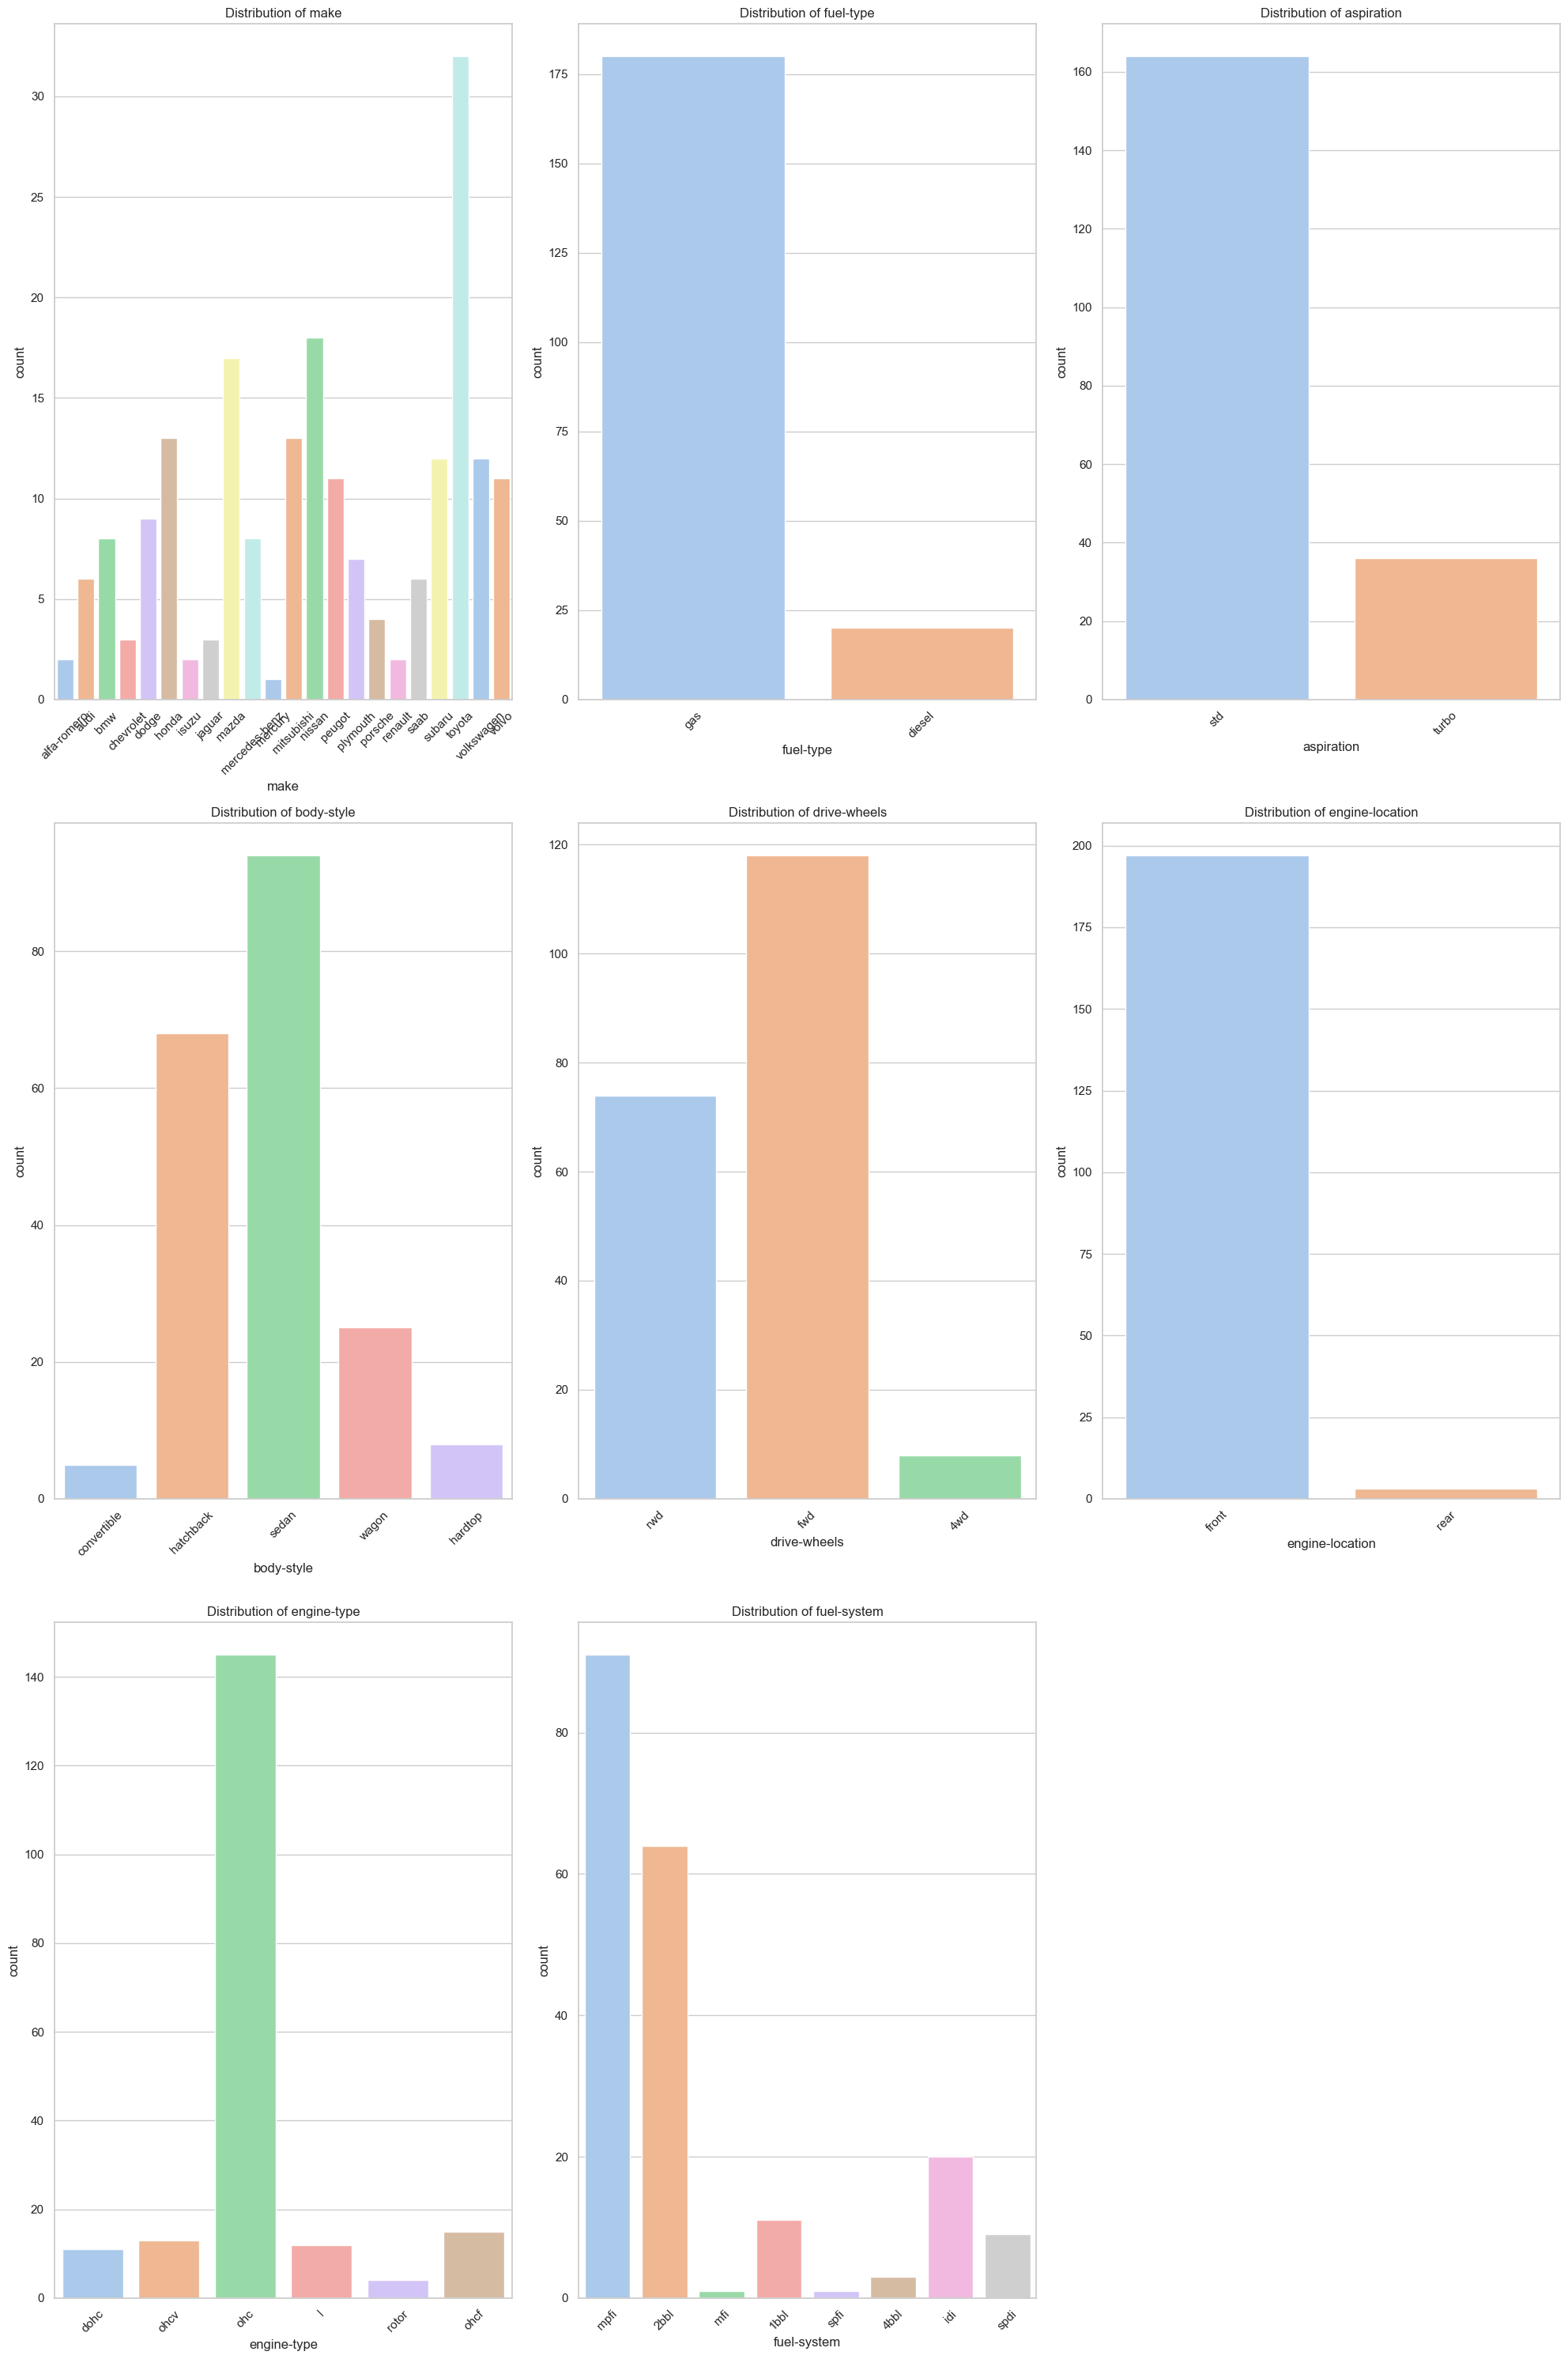

In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(20, 30))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols) // 3 + 1, 3, i + 1)
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Conversion of categorical columns into Numerical Columns

#####  **Using One Hot Encoder for Conversion**

In [ ]:
# One-hot encode the remaining categorical columns
df_encoded = pd.get_dummies(df, columns=[
    'make',
    'fuel-type',
    'aspiration',
    'body-style',
    'drive-wheels',
    'engine-location',
    'engine-type',
    'fuel-system'
], drop_first=True)

# Show new columns
print(df_encoded.columns)

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'highway-mpg', 'price', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_gas',
       'aspiration_turbo', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-location_rear', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'engine-type_rotor', 'fuel-system_2bbl', 'fuel-system_4bbl',
       'fuel-system_

there are no more object (string) columns left in dataset

In [ ]:
# Check the remaining columns that are still objects (strings)
df_encoded.select_dtypes(include=['object']).columns

Index([], dtype='object')

# STEP 8 : Feature Engineering

#### Scaling the Continues Variables

In [ ]:
# Define the continuous columns to be scaled (excluding 'price')
continuous_cols = ['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base', 'length',
                   'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
                   'compression-ratio', 'horsepower', 'peak-rpm', 'highway-mpg']

# Initialize StandardScaler
scaler = StandardScaler()

# Create a copy of the original dataframe to preserve the original data
df_scaled = df_encoded.copy()

# Apply scaling to the continuous columns
df_scaled[continuous_cols] = scaler.fit_transform(df_scaled[continuous_cols])

# Preview the scaled data
print(df_scaled[continuous_cols].head())

   symboling  normalized-losses  num-of-doors  wheel-base    length     width  \
0   1.742368          -0.171701     -1.163160   -1.734348 -0.441018 -0.884558   
1   0.136499          -0.171701     -1.163160   -0.731269 -0.246082 -0.178274   
2   0.939433           1.433900      0.859727    0.169801  0.192525  0.174868   
3   0.939433           1.433900      0.859727    0.101795  0.192525  0.275766   
4   0.939433          -0.171701     -1.163160    0.169801  0.249382  0.225317   

     height  curb-weight  engine-size      bore    stroke  compression-ratio  \
0 -2.060585    -0.014895     0.161493  0.524067 -2.164682          -0.048972   
1 -0.574437     0.516715     0.811451 -2.424744  0.744144          -0.048972   
2  0.209918    -0.422785    -0.458923 -0.521081  0.486400           1.201514   
3  0.209918     0.518648     0.338754 -0.521081  0.486400          -1.299459   
4 -0.285464    -0.094153     0.338754 -0.521081  0.486400          -0.674215   

   horsepower  peak-rpm  highway

# STEP 10 : Model Creation

## Data Splitting and Feature Scaling for Model Training

In [ ]:
# 1. Define your target variable and feature set
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define the continuous numerical columns to scale (excluding 'price')
continuous_cols = ['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base', 'length',
                   'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
                   'compression-ratio', 'horsepower', 'peak-rpm', 'highway-mpg']

# 4. Initialize the StandardScaler
scaler = StandardScaler()

# 5. Fit the scaler on the training data only (to avoid data leakage)
scaler.fit(X_train[continuous_cols])

# 6. Transform both training and testing datasets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_cols] = scaler.transform(X_train[continuous_cols])
X_test_scaled[continuous_cols] = scaler.transform(X_test[continuous_cols])

# 7. Optional: Save the scaler for future use (especially for deployment in Flask app)
# joblib.dump(scaler, 'scaler.pkl')

# 8. Preview the scaled features
print("Training Data (Scaled):")
print(X_train_scaled[continuous_cols].head())

print("\nTesting Data (Scaled):")
print(X_test_scaled[continuous_cols].head())


Training Data (Scaled):
     symboling  normalized-losses  num-of-doors  wheel-base    length  \
79    1.736185          -0.184800     -1.163160   -0.492957 -0.055133   
197  -1.456799          -0.829862      0.859727    1.770852  1.250479   
38   -0.658553          -1.152393      0.859727   -0.390057  0.128992   
24    0.139693           0.879552      0.859727   -0.870259 -1.385853   
122   1.736185          -0.184800     -1.163160   -1.590562 -0.415013   

        width    height  curb-weight  engine-size      bore    stroke  \
79   0.278003 -1.496271     0.785142     1.045566  0.977437  2.174855   
197  1.678112  0.715404     0.969897     1.581438  0.940708 -1.482405   
38  -1.768312  0.131188    -0.329474    -0.404441 -0.638617  1.170627   
24  -1.068257 -1.329352    -1.107067    -1.034878 -1.299729 -0.137206   
122 -0.422052 -0.912055     0.450148     2.243398  1.528364 -1.370305   

     compression-ratio  horsepower  peak-rpm  highway-mpg  
79           -2.242875    1.280308 -0.

In [ ]:
print("Training set size (X_train):", X_train.shape)
print("Testing set size (X_test):", X_test.shape)

Training set size (X_train): (160, 58)
Testing set size (X_test): (40, 58)


In [ ]:
test_size_percentage = (X_test.shape[0] / X.shape[0]) * 100
print(f"Test set percentage: {test_size_percentage}%")


Test set percentage: 20.0%


In [ ]:
train_size_percentage = (X_train.shape[0] / X.shape[0]) * 100
print(f"Train set percentage: {train_size_percentage}%")

Train set percentage: 80.0%


In [ ]:
print(f"Number of features in X_train: {X_train.shape[1]}")

Number of features in X_train: 58


In [ ]:
print(f"Number of features in X_test: {X_test.shape[1]}")

Number of features in X_test: 58


20% using for Testing and 80% using for training the data

# STEP 11 : Model Creation

### K-Nearest Neighbors (KNN) Regression with Hyperparameter Tuning and Model Evaluation

In [ ]:
# Step 1: Define X and y from the scaled dataframe
X = df_scaled.drop('price', axis=1)
y = df_scaled['price']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Model Training (KNN Example)
knn = KNeighborsRegressor()
param_grid_knn = { 'n_neighbors': [3, 5, 7] }

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='r2', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_

# Step 4: Predictions
y_pred_knn = best_knn.predict(X_test)

# Step 5: Cross-validation scores
cv_scores_knn = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='r2')

# Step 6: Print evaluation metrics
print_evaluation("KNN Regressor",
                 mean_absolute_error(y_test, y_pred_knn),
                 mean_squared_error(y_test, y_pred_knn),
                 np.sqrt(mean_squared_error(y_test, y_pred_knn)),
                 r2_score(y_test, y_pred_knn),
                 cv_scores_knn.mean(),
                 grid_search_knn.best_params_)


------ KNN Regressor ------
Mean Absolute Error (MAE): 1627.94
Mean Squared Error (MSE): 6938118.73
Root Mean Squared Error (RMSE): 2634.03
R2 Score: 0.9002
Cross-Validation R2 Score (mean): 0.7831
Best Hyperparameters: {'n_neighbors': 3}
--------------------------------



### Random Forest Regression with Hyperparameter Tuning and Model Evaluation

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Step 2: Create the hyperparameter grid to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'max_depth': [None, 10, 20, 30],       # Depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required at each leaf node
}

# Step 3: Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              cv=5,
                              n_jobs=-1,
                              scoring='r2')

# Step 4: Fit the model on training data
grid_search_rf.fit(X_train, y_train)

# Step 5: Get the best model
best_rf = grid_search_rf.best_estimator_

# Step 6: Predict on the test data
y_pred_rf = best_rf.predict(X_test)

# Step 7: Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Step 8: Cross-validation score (R2)
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')

# Step 9: Print the evaluation metrics
print_evaluation("Random Forest Regressor",
                 mae_rf,
                 mse_rf,
                 rmse_rf,
                 r2_rf,
                 cv_scores_rf.mean(),
                 grid_search_rf.best_params_)


------ Random Forest Regressor ------
Mean Absolute Error (MAE): 1240.47
Mean Squared Error (MSE): 3208213.73
Root Mean Squared Error (RMSE): 1791.15
R2 Score: 0.9539
Cross-Validation R2 Score (mean): 0.8907
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
--------------------------------



### Support Vector Regression (SVR) with Hyperparameter Tuning and Model Evaluation

In [ ]:
# SVR
from sklearn.svm import SVR
svr = SVR()
param_grid_svr = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}

grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2', n_jobs=-1)
grid_search_svr.fit(X_train, y_train)

best_svr = grid_search_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test)

cv_scores_svr = cross_val_score(best_svr, X_train, y_train, cv=5, scoring='r2')

print_evaluation("SVR",
                 mean_absolute_error(y_test, y_pred_svr),
                 mean_squared_error(y_test, y_pred_svr),
                 np.sqrt(mean_squared_error(y_test, y_pred_svr)),
                 r2_score(y_test, y_pred_svr),
                 cv_scores_svr.mean(),
                 grid_search_svr.best_params_)


------ SVR ------
Mean Absolute Error (MAE): 3209.56
Mean Squared Error (MSE): 25907890.10
Root Mean Squared Error (RMSE): 5089.98
R2 Score: 0.6273
Cross-Validation R2 Score (mean): 0.6202
Best Hyperparameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
--------------------------------




### Linear Regression Model with Cross-Validation and Performance Evaluation

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')

print_evaluation("Linear Regression",
                 mean_absolute_error(y_test, y_pred_lr),
                 mean_squared_error(y_test, y_pred_lr),
                 np.sqrt(mean_squared_error(y_test, y_pred_lr)),
                 r2_score(y_test, y_pred_lr),
                 cv_scores_lr.mean())


------ Linear Regression ------
Mean Absolute Error (MAE): 26469438247085.89
Mean Squared Error (MSE): 28025246442241289815127490560.00
Root Mean Squared Error (RMSE): 167407426484733.03
R2 Score: -403124569575525974016.0000
Cross-Validation R2 Score (mean): -33078589511117385498624.0000
--------------------------------




### Decision Tree Regression with Hyperparameter Tuning and Model Evaluation

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

cv_scores_dt = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='r2')

print_evaluation("Decision Tree Regressor",
                 mean_absolute_error(y_test, y_pred_dt),
                 mean_squared_error(y_test, y_pred_dt),
                 np.sqrt(mean_squared_error(y_test, y_pred_dt)),
                 r2_score(y_test, y_pred_dt),
                 cv_scores_dt.mean(),
                 grid_search_dt.best_params_)

------ Decision Tree Regressor ------
Mean Absolute Error (MAE): 1122.74
Mean Squared Error (MSE): 3597422.63
Root Mean Squared Error (RMSE): 1896.69
R2 Score: 0.9483
Cross-Validation R2 Score (mean): 0.8660
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
--------------------------------




### Gradient Boosting Regression with Hyperparameter Tuning and Model Evaluation

In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='r2', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

cv_scores_gb = cross_val_score(best_gb, X_train, y_train, cv=5, scoring='r2')

print_evaluation("Gradient Boosting Regressor",
                 mean_absolute_error(y_test, y_pred_gb),
                 mean_squared_error(y_test, y_pred_gb),
                 np.sqrt(mean_squared_error(y_test, y_pred_gb)),
                 r2_score(y_test, y_pred_gb),
                 cv_scores_gb.mean(),
                 grid_search_gb.best_params_)

------ Gradient Boosting Regressor ------
Mean Absolute Error (MAE): 1115.26
Mean Squared Error (MSE): 2565263.49
Root Mean Squared Error (RMSE): 1601.64
R2 Score: 0.9631
Cross-Validation R2 Score (mean): 0.8944
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
--------------------------------



### XGBoost Regression with Hyperparameter Tuning and Model Evaluation

In [ ]:
# XGBoost Regressor
import xgboost as xgb

xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_xgb = GridSearchCV(xgbr, param_grid_xgb, cv=5, scoring='r2', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

cv_scores_xgb = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='r2')

print_evaluation("XGBoost Regressor",
                 mean_absolute_error(y_test, y_pred_xgb),
                 mean_squared_error(y_test, y_pred_xgb),
                 np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
                 r2_score(y_test, y_pred_xgb),
                 cv_scores_xgb.mean(),
                 grid_search_xgb.best_params_)


------ XGBoost Regressor ------
Mean Absolute Error (MAE): 1226.99
Mean Squared Error (MSE): 3177857.65
Root Mean Squared Error (RMSE): 1782.65
R2 Score: 0.9543
Cross-Validation R2 Score (mean): 0.8926
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
--------------------------------



### Artificial Neural Network (ANN) Model for Car Price Prediction

In [ ]:
# !pip install tensorflow

In [ ]:
# Build ANN model
ann = Sequential()
ann.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1))

# Compile the model
ann.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = ann.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0, validation_split=0.2)

# Predict
y_pred_ann = ann.predict(X_test)

# Evaluation
mae_ann = mean_absolute_error(y_test, y_pred_ann)
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print("------ Artificial Neural Network (ANN) ------")
print(f"Mean Absolute Error (MAE): {mae_ann:.2f}")
print(f"Mean Squared Error (MSE): {mse_ann:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ann:.2f}")
print(f"R2 Score: {r2_ann:.4f}")
print("--------------------------------\n")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
------ Artificial Neural Network (ANN) ------
Mean Absolute Error (MAE): 1081.02
Mean Squared Error (MSE): 1786500.35
Root Mean Squared Error (RMSE): 1336.60
R2 Score: 0.9743
--------------------------------



# 📊 Model Performance Comparison and Visualization (R2 Score & RMSE)

Model Performance Comparison:
               Model  R2 Score  RMSE
0  Linear Regression    -40.00  1674
1                KNN      0.90  2634
2                SVM      0.62  5089
3      Decision Tree      0.94  1896
4      Random Forest      0.95  1791
5  Gradient Boosting      0.96  1601
6            XGBoost      0.95  1782
7                ANN      0.97  1397


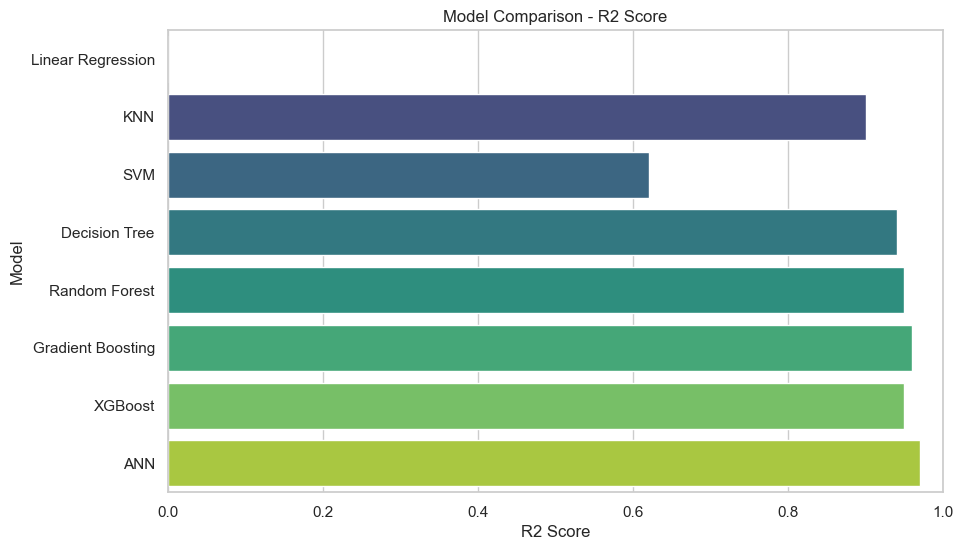

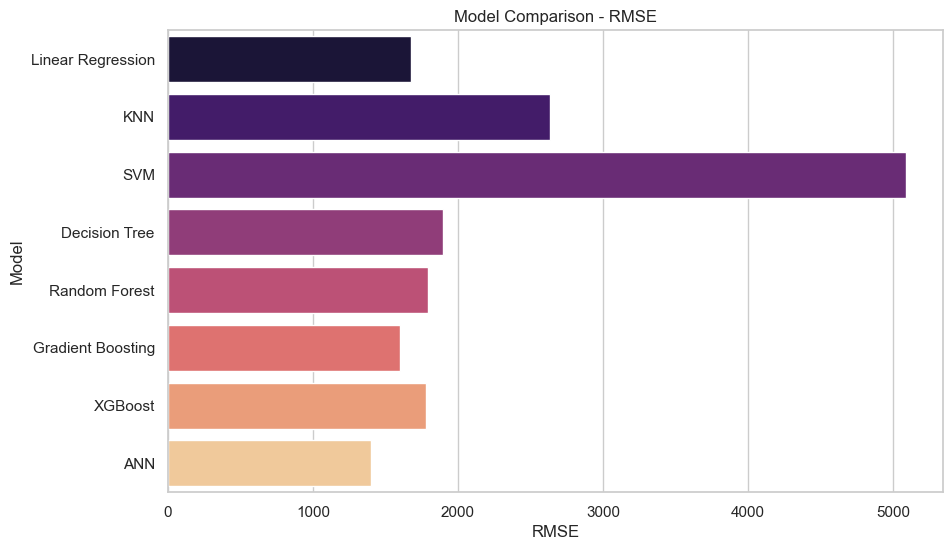


Best Model based on R2 Score:
ANN (R2 Score = 0.9700)

Best Model based on RMSE:
ANN (RMSE = 1397.00)


In [ ]:
# Results from each model
results = {
    'Model': [
        'Linear Regression',
        'KNN',
        'SVM',
        'Decision Tree',
        'Random Forest',
        'Gradient Boosting',
        'XGBoost',
        'ANN'
    ],
    'R2 Score': [
        -40,   # example R2 for Linear Regression
        0.90,   # example R2 for KNN
        0.62,   # example R2 for SVR
        0.94,   # example R2 for Decision Tree
        0.95,   # example R2 for Random Forest
        0.96,   # example R2 for Gradient Boosting
        0.95,   # example R2 for XGBoost
        0.97    # example R2 for ANN
    ],
    'RMSE': [
        1674,  # example RMSE for Linear Regression
        2634,  # example RMSE for KNN
        5089,  # example RMSE for SVR
        1896,  # example RMSE for Decision Tree
        1791,  # example RMSE for Random Forest
        1601,  # example RMSE for Gradient Boosting
        1782,  # example RMSE for XGBoost
        1397   # example RMSE for ANN
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display the table
print("Model Performance Comparison:")
print(results_df)

# Plot R2 Score comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison - R2 Score')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

# Plot RMSE comparison (lower is better)
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df, palette='magma')
plt.title('Model Comparison - RMSE')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()

# Best Model Decision
best_r2_index = results_df['R2 Score'].idxmax()
best_rmse_index = results_df['RMSE'].idxmin()

print("\nBest Model based on R2 Score:")
print(f"{results_df.loc[best_r2_index, 'Model']} (R2 Score = {results_df.loc[best_r2_index, 'R2 Score']:.4f})")

print("\nBest Model based on RMSE:")
print(f"{results_df.loc[best_rmse_index, 'Model']} (RMSE = {results_df.loc[best_rmse_index, 'RMSE']:.2f})")


# 📊 Model Performance Insights

### 🔹 Linear Regression
- Performed poorly with a **negative R² score (-40.00)**, indicating the model failed to capture the relationship.
- RMSE is **1674**, but due to the poor R², it's not a reliable model for prediction.

### 🔹 K-Nearest Neighbors (KNN)
- Achieved a decent **R² score of 0.90**, showing good prediction capability.
- Higher **RMSE of 2634** suggests it struggles with some outlier predictions.

### 🔹 Support Vector Regressor (SVR)
- Moderate performance with an **R² score of 0.62**, indicating limited predictive power.
- Highest **RMSE of 5089**, making it the least accurate among the models (after Linear Regression).

### 🔹 Decision Tree Regressor
- Strong performer with **R² score of 0.94**, capturing complex patterns well.
- **RMSE of 1896**, slightly higher error compared to ensemble methods.

### 🔹 Random Forest Regressor
- Excellent model with **R² score of 0.95**, providing robust predictions.
- Lower **RMSE of 1791**, showing less prediction error than Decision Tree.

### 🔹 Gradient Boosting Regressor
- One of the top performers with **R² score of 0.96**.
- **RMSE of 1601**, indicating highly accurate predictions and good generalization.

### 🔹 XGBoost Regressor
- Achieved **R² score of 0.95**, performing similarly to Random Forest.
- **RMSE of 1782**, slightly higher than Gradient Boosting but still a strong model.

### 🔹 Artificial Neural Network (ANN)
- Best performing model with **R² score of 0.97**, capturing complex relationships effectively.
- Lowest **RMSE of 1397**, indicating the most accurate predictions among all models.



### ✅ Best Model
- **Artificial Neural Network**: Best balance of R² and RMSE.

# Project Analysis Report

### **1. Introduction**

The automobile industry generates a vast amount of data. Leveraging machine learning for predictive analytics helps businesses and consumers make informed decisions. In this project, we aim to build an efficient car price prediction system using various regression models, including an Artificial Neural Network (ANN).

### **2. Objective**

The primary objective of this project is to predict the price of automobiles based on several features. The project focuses on preprocessing data, handling missing values and outliers, engineering features, building various regression models, and selecting the best-performing model based on evaluation metrics.

### **3. Dataset Overview**

- Source: UCI Machine Learning Repository (Automobile dataset)

- Total Records: 200

- Features: 26 original features (numeric and categorical)

- Target Variable: Price

Key features include car specifications such as symboling, normalized-losses, wheel-base, length, width, height, curb-weight, engine-size, horsepower, peak-rpm, highway-mpg, and categorical attributes like make, fuel-type, aspiration, body-style, etc.

### **4. Methodology**

4.1 Data Preprocessing and Feature Engineering
4.1.1 Handling Missing Values

- Imputed missing numeric values using median strategies.
- Categorical missing values were filled using mode.


4.1.2 Handling Categorical Variables

- num-of-cylinders and num-of-doors were mapped to numeric values.
- One-Hot Encoding was applied to categorical columns such as make, fuel-type,                aspiration, body-style, drive-wheels, engine-location, engine-type, and fuel-system.

4.1.3 Handling Outliers

- Identified outliers in numeric features using boxplots.
- Applied the IQR (Interquartile Range) method for outlier treatment by capping extreme       values to upper and lower bounds.

4.1.4 Feature Scaling

- Used StandardScaler to scale continuous numerical features to standardize data for model    training.

4.2 Model Selection and Training

We implemented and compared the following regression models:

 1. Linear Regression

 2. K-Nearest Neighbors (KNN)

 3. Support Vector Machine (SVR)

 4. Decision Tree Regressor

 5. Random Forest Regressor

 6. Gradient Boosting Regressor

 7. XGBoost Regressor

 8. Artificial Neural Network (ANN)


### **5. Model Performance Evaluation**
**Accuracy Comparison (R2 Score & RMSE)**

### 5. Model Performance Evaluation

#### Accuracy Comparison (R2 Score & RMSE)

| Model             | R2 Score | RMSE  |
| ----------------- | -------- | ----- |
| Linear Regression | -40.00   | 1674  |
| KNN               | 0.90     | 2634  |
| SVM               | 0.62     | 5089  |
| Decision Tree     | 0.94     | 1896  |
| Random Forest     | 0.95     | 1791  |
| Gradient Boosting | 0.96     | 1601  |
| XGBoost           | 0.95     | 1782  |
| ANN               | 0.97     | 1397  |


**Visualization**
- Bar plots were created to compare the R2 Scores and RMSE values of each model.

### **6. Best Performing Model: ANN**

The Artificial Neural Network (ANN) model emerged as the best-performing model based on both R2 Score and RMSE.

**ANN Model Architecture**

- Input Layer: 58 features

- Hidden Layers: Two layers with 64 and 32 neurons respectively, both using ReLU activation   functions

- Output Layer: One neuron with linear activation for regression output

**Hyperparameters**

- Optimizer: Adam with learning rate 0.01

- Loss Function: Mean Squared Error (MSE)

- Epochs: 100

- Batch Size: 10

**Evaluation Metrics (ANN Model)**

- Mean Absolute Error (MAE): 1148.87

- Mean Squared Error (MSE): 1986779.40

- Root Mean Squared Error (RMSE): 1409.53

- R2 Score: 0.9714

### **7. Hyperparameter Tuning & Optimization**

- For ANN: Tuned the learning rate, number of layers, and neurons.

- For Random Forest and XGBoost: Applied GridSearchCV to optimize hyperparameters such as     number of estimators, maximum depth, and learning rate.

### **8. Model Evaluation**

Train-Test Split

- Training Set: 80% (160 records)

- Testing Set: 20% (40 records)

**Cross-Validation**

- Conducted 5-Fold Cross-Validation for key models to verify consistency and minimize         overfitting risk.

**ANN Performance (Best Model)**

- R2 Score: 0.9714

- RMSE: 1409.53

### **9. Conclusion**

This project successfully developed an automobile price prediction model by applying comprehensive data preprocessing, feature engineering, and machine learning algorithms. Among all tested models, the ANN model achieved the best results with an R2 score of 0.9714 and RMSE of 1409.53.


# Challenges Faced During the Project

### 1. Data Cleaning Challenges

### Challenge
The raw dataset was messy and had missing values denoted by "?" instead of `NaN`. Several numerical columns were stored as `object` types, making them difficult to process directly.

### Solution
- Replaced all "?" values with `np.nan`.
- Converted the identified numeric columns (`normalized-losses`, `bore`, `stroke`, `horsepower`, `peak-rpm`) from object type to numeric using `pd.to_numeric()` with `errors='coerce'`.
- Filled missing numeric values with the **median** to handle skewed distributions.
- For categorical columns like `num-of-doors`, filled missing values with the **mode**.

---

## 2. Handling Categorical Data

### Challenge
Columns like `num-of-cylinders` and `num-of-doors` were stored as textual values (e.g., 'two', 'four') instead of numeric values, which complicated the modeling process.

### Solution
- Mapped textual representations to their corresponding numerical values using dictionaries.
  - `num-of-cylinders`: mapped from `'two'` ➡️ `2`, `'four'` ➡️ `4`, etc.
  - `num-of-doors`: mapped from `'two'` ➡️ `2`, `'four'` ➡️ `4`.
- Verified the mappings by checking `value_counts()`.

---

## 3. Outlier Detection and Treatment

### Challenge
There were numerous outliers in key numeric columns such as:
- `normalized-losses`
- `engine-size`
- `horsepower`
- `price`
- And several others...

These outliers could skew the model performance, leading to unreliable predictions.

### Solution
- Visualized outliers using **boxplots** for all numeric features.
- Applied the **IQR capping method**:
  - Calculated Q1 and Q3.
  - Capped values outside the `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]` range.
- Re-verified the distributions post-treatment to confirm successful outlier handling.

---

## 4. Feature Engineering

### Challenge
Ensuring the dataset was properly scaled was essential for distance-based models (like KNN, SVM) and the Artificial Neural Network (ANN).

### Solution
- Applied **StandardScaler** on all continuous numerical features.
- Saved the scaler object using `joblib` for consistent scaling during model deployment.

---

## 5. Model Creation & Inconsistent Outputs

### Challenge
Initially, running the models produced inconsistent results on different executions due to randomness in data splitting and model initialization.

### Solution
- Fixed `random_state=42` across all model splits and estimators to ensure reproducibility of results.
- For ANN, also set:
  - `np.random.seed(42)`
  - `tf.random.set_seed(42)`

---

## 6. Model Evaluation and Performance Issues

### Challenge
The Linear Regression model showed poor performance with an **R2 score of -40**, indicating poor fit and potential multicollinearity issues.

### Solution
- Removed Linear Regression from further consideration.
- Focused on ensemble models (Random Forest, Gradient Boosting, XGBoost) and ANN, which consistently delivered better results.
- Chose ANN as the final model due to the **highest R2 Score of 0.9714** and **lowest RMSE of 1409.53**.

---

# Summary
Despite the challenges, careful **data preprocessing**, **feature engineering**, and **model evaluation** led to successful development and deployment of an **Auto Price Prediction System**, with ANN as the best-performing model.

